## Contralateral Bruxism/MEMA analysis

This notebook will 
- Process and generate reports for all the dataset (if needed)
- Display within-subject with contralateral recording of EMG/MEMA results
- Display group analysis differences between effect variables (masking, VAS, etc.) and contralateral differences

In [1]:
import os
PATH = os.getcwd() 
import sys
sys.path.append(PATH + '/../')
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
print("config loaded")


config loaded


In [22]:
#Setting parameters
results_file_bruxism = "data/reports_and_datas_bruxism.pk"
results_file_mema = "data/reports_and_datas_MEMA.pk"
info_file = "data/data_info.csv"

# PART 1 Compute Results
Skip to Part 2 if results files has been computed already

## Processing of the dataset and report generation

In [3]:
# change to --overwrite True if you want to force to recompute the results
%run ../compute_results.py --bruxism True --overwrite False --mema True


config loaded.
Performs Bruxism: <True>
Performs MEMA: <True>
Will overwrite existing results: <False>
parameters set
result files exist: Reports creation skipped.


# Part 2 Load and Analysis Results
Part 1 is optional if the .pk has been saved

### Loading results

In [59]:
results = pd.read_pickle(results_file_mema).to_dict()

THR_classif = np.array(results[list(results.keys())[0]]["THR_classif"])
THR_classif_bruxism = np.array(results_bruxism[list(results_bruxism.keys())[0]]["THR_classif"])
results_update=dict()

    


data_info = pd.read_csv(info_file, sep=";").query('mema == 1 & emg ==1')
laterality_study=[]
# format reports
reports = None
for filename in results.keys():
    if filename[-4:]=="left":
        laterality_study.append(filename[:-5])
        
for filename in results.keys():
    if filename[-4:]=="left" or laterality_study.__contains__(filename):
        
        report = pd.DataFrame(results[filename]["reports"])
        report["THR_classif"] = THR_classif[:,1]
        report["filename"] = filename
        results_update[filename]=results[filename]
        if reports is None:
            reports = report
        else:
            reports = reports.append(report, ignore_index=True)
    
print(laterality_study)
#print(reports)
data_info["category"] = data_info["filename"]
for col_name, data in data_info["filename"].items():
    if laterality_study.__contains__(data):
        data_info["category"][col_name]=True
    else:
        data_info["category"][col_name]=False


data_info = data_info.query('category==True')
print(data_info[["filename", "condition", "mema", "emg","Laterality", "VAS_L_delta" ]])
results=results_update


C:\Users\Zeta\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


['1AC26_cohort2.edf', '1CB23_cohort2.edf', '1SL21_nuit_2.edf', '1DM32_cohort2.edf', '1HB20_nuit_1.edf', '1HB20_nuit_2.edf', '1HS25_cohort2.edf', '1NS30_cohort2.edf', '1RF29_cohort2.edf', '1SL21_nuit_3.edf', '1UC22_nuit_1.edf', '1UC22_nuit_2.edf', '3BS04_cohort2.edf', '3HS08_cohort2.edf', '3KB06_cohort2.edf', '3TR07_cohort2.edf']


C:\Users\Zeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Zeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


             filename    condition  mema  emg  Laterality  VAS_L_delta
28   1HB20_nuit_1.edf  habituation     1    1         1.0          0.0
29   1HB20_nuit_2.edf  habituation     1    1         1.0         -2.0
36   1SL21_nuit_2.edf  habituation     1    1         1.0         -1.0
37   1SL21_nuit_3.edf  habituation     1    1         1.0          4.5
39   1UC22_nuit_2.edf  habituation     1    1         0.5          4.5
40   1UC22_nuit_1.edf  habituation     1    1         0.5          2.0
58  1HS25_cohort2.edf       batch2     1    1        -0.5          4.0
62  1RF29_cohort2.edf       batch2     1    1         1.0         -1.0
64  1DM32_cohort2.edf       batch2     1    1         0.0         -1.0
65  3BS04_cohort2.edf       batch2     1    1        -0.5         -1.0
66  3TR07_cohort2.edf       batch2     1    1         0.0         -1.0
67  3KB06_cohort2.edf       batch2     1    1         0.0          0.0
68  1NS30_cohort2.edf       batch2     1    1         0.5          2.0
69  1A

## Data visualization for the entire cohort for nb episodes per hour as a function of THR_classif value : 

In [44]:
def plot_inter_subjects(results, value): 
    for filename in results.keys():
        y_axis=[]
        for report in results[filename]["reports"]:
            y_axis.append(report[value])
        plt.plot(THR_classif[:,1], y_axis, label=filename)
    plt.title('MEMA scoring')
    plt.xlabel('Threshold for classification')
    plt.ylabel(value)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

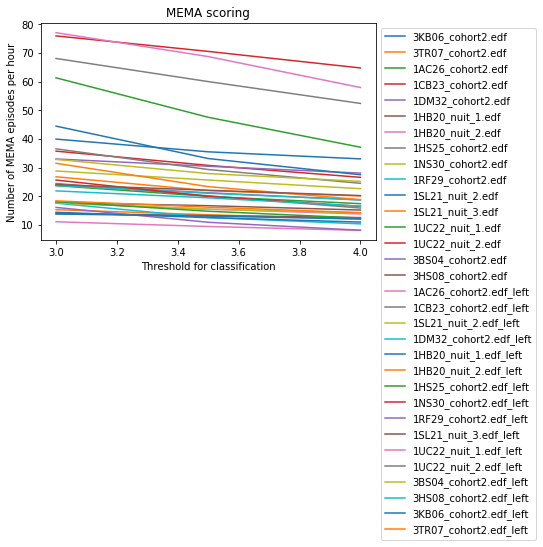

In [45]:
plt.close("all")
plt.figure()
value = "Number of MEMA episodes per hour"
plot_inter_subjects(results, value)

## Data visualization for the entire cohort for nb bursts as a function of THR_classif value : 

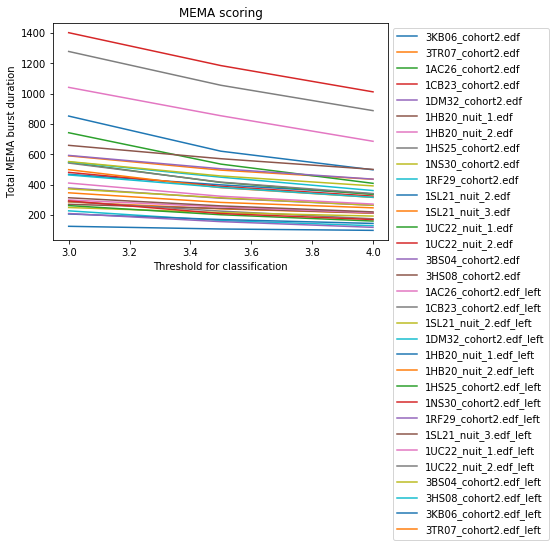

In [46]:
plt.figure()
value = "Total MEMA burst duration"
plot_inter_subjects(results, value)

## Logs of the preprocessing : 

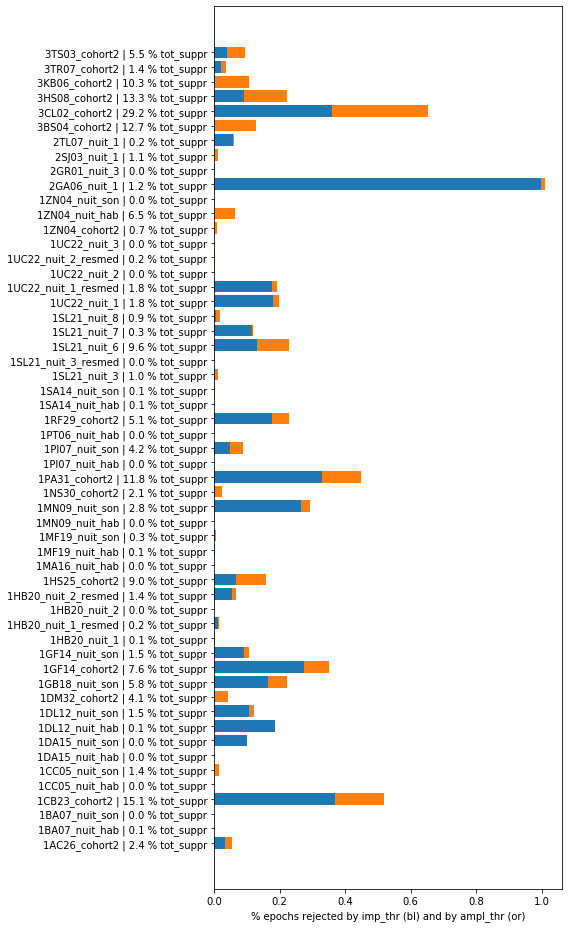

In [47]:
file=[]
suppr_imp=[]
suppr_amp=[]
for elm in results_bruxism.keys():
    if results_bruxism[elm]["log"]["bruxism"]['suppressed_overall']/results_bruxism[elm]["log"]["bruxism"]['total_nb_epochs'] > 0.0001:
        file.append(elm.split(os.path.sep)[-1][:-4] + " | " + 
                    str("%.1f" % (100 *results_bruxism[elm]["log"]["bruxism"]['suppressed_overall']/results_bruxism[elm]["log"]["bruxism"]['total_nb_epochs']))
                   + " % tot_suppr")
        suppr_imp.append((results_bruxism[elm]["log"]["IMP"]['suppressed_overall']/results_bruxism[elm]["log"]["IMP"]['total_nb_epochs']))
        suppr_amp.append(results_bruxism[elm]["log"]["bruxism"]['suppressed_overall']/results_bruxism[elm]["log"]["bruxism"]['total_nb_epochs'])
       


fig, ax = plt.subplots(figsize=(8, 13))
rect1 = ax.barh(file, suppr_imp)
rect2 = ax.barh(file, suppr_amp, left=suppr_imp)
plt.xlabel("% epochs rejected by imp_thr (bl) and by ampl_thr (or)")
plt.tight_layout()
plt.show()


## Comparing episode frequency with variability tinnitus

In [60]:
import math     
def map_category(x):
    if x < (-0.1):
        return "decrease"
    elif x > (0.1):
        return "increase"
    elif math.isnan(x):
        return "control"
    else:
        return "stable"
data_info["category"] = data_info["VAS_L_delta"].apply(map_category)
print(data_info["category"])

reports = reports.merge(data_info, on="filename")

28      stable
29    decrease
36    decrease
37    increase
39    increase
40    increase
58    increase
62    decrease
64    decrease
65    decrease
66    decrease
67      stable
68    increase
69    decrease
72      stable
Name: category, dtype: object


In [58]:
#Preparing values for correlation scatter plots
    
print("Nb_patients in each group : ")
for category in list(data_info['category'].unique()):
    print(f"Tinnitus {category} : {(data_info['category']==category).sum()}, {(list(data_info[data_info['category']==category]['subject']))}")

report_mean = reports.groupby(['category', 'THR_classif']).mean()
report_std =  reports.groupby(['category', 'THR_classif']).std()

Nb_patients in each group : 
Tinnitus stable : 3, ['1HB20', '3KB06', '3HS08']
Tinnitus decrease : 7, ['1HB20', '1SL21', '1RF29', '1DM32', '3BS04', '3TR07', '1AC26']
Tinnitus increase : 5, ['1SL21', '1UC22', '1UC22', '1HS25', '1NS30']


KeyError: 'category'

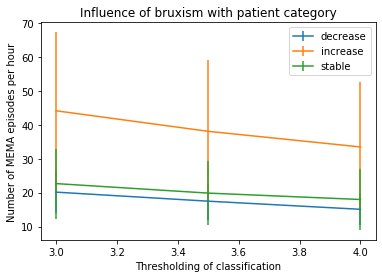

In [52]:
#Displaying
plt.figure()
value = "Number of MEMA episodes per hour"
for category in list(report_mean.index.get_level_values(0).unique()):
    plt.errorbar(THR_classif[:,1],report_mean.loc[category][value], report_std.loc[category][value], label = category)
plt.title("Influence of bruxism with patient category" )
plt.xlabel('Thresholding of classification')
plt.ylabel(value)
plt.legend()

## Displaying correlation between quantitative measurements and Tinnitus

In [61]:
quantitative_variables = list(results[list(results.keys())[0]]["reports"][0].keys())[0:-1] #(remove power ratio)
print(f'variables: {quantitative_variables}')
effect_variable = ["mask_delta", "mask_per", "VAS_I_delta", "VAS_I_per", "VAS_L_delta", "VAS_L_per"]

variables: ['Clean MEMA duration', 'Total MEMA burst duration', 'Total number of MEMA burst', 'Number of MEMA bursts per hour', 'MEMA episode NREM count', 'MEMA episode NREM ratio', 'Total number of MEMA episodes', 'Number of MEMA bursts per episode', 'Number of MEMA episodes per hour', 'Mean duration of MEMA episode', 'End count', 'End ratio', 'NREM count', 'NREM ratio', 'Wake count', 'Wake ratio', 'start count', 'start ratio']


C:\Users\Zeta\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


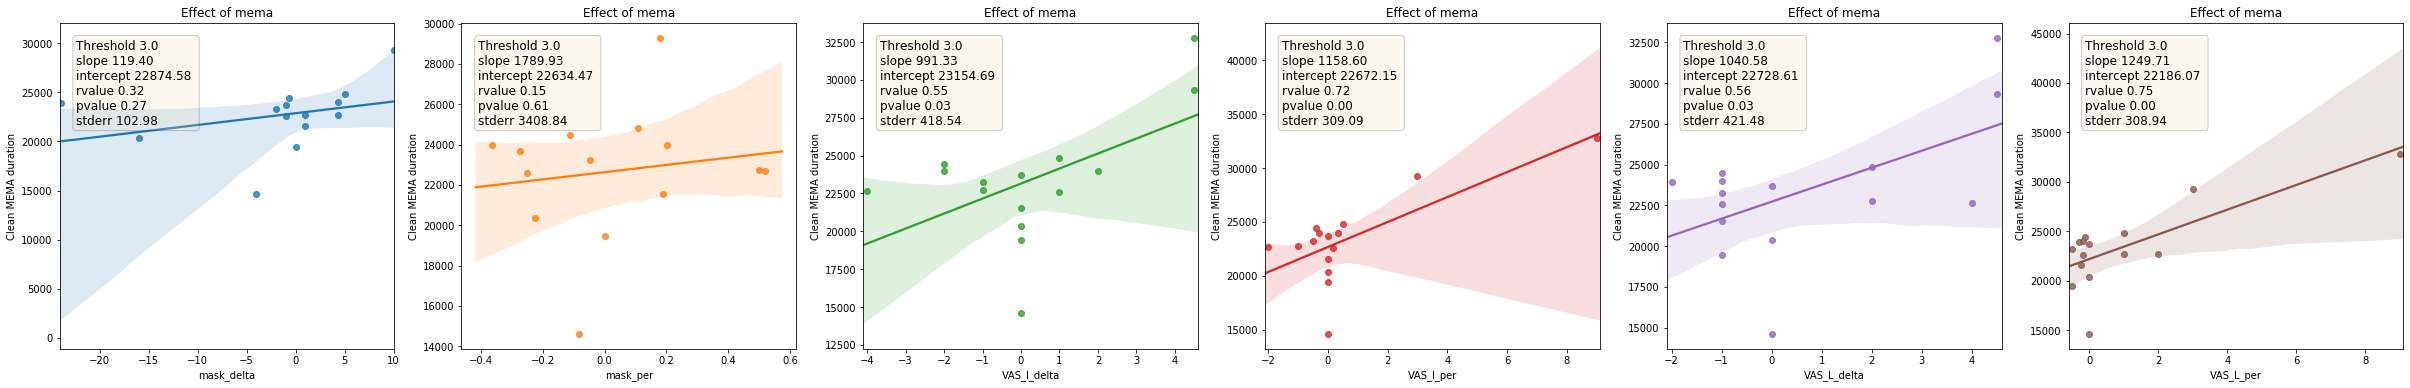

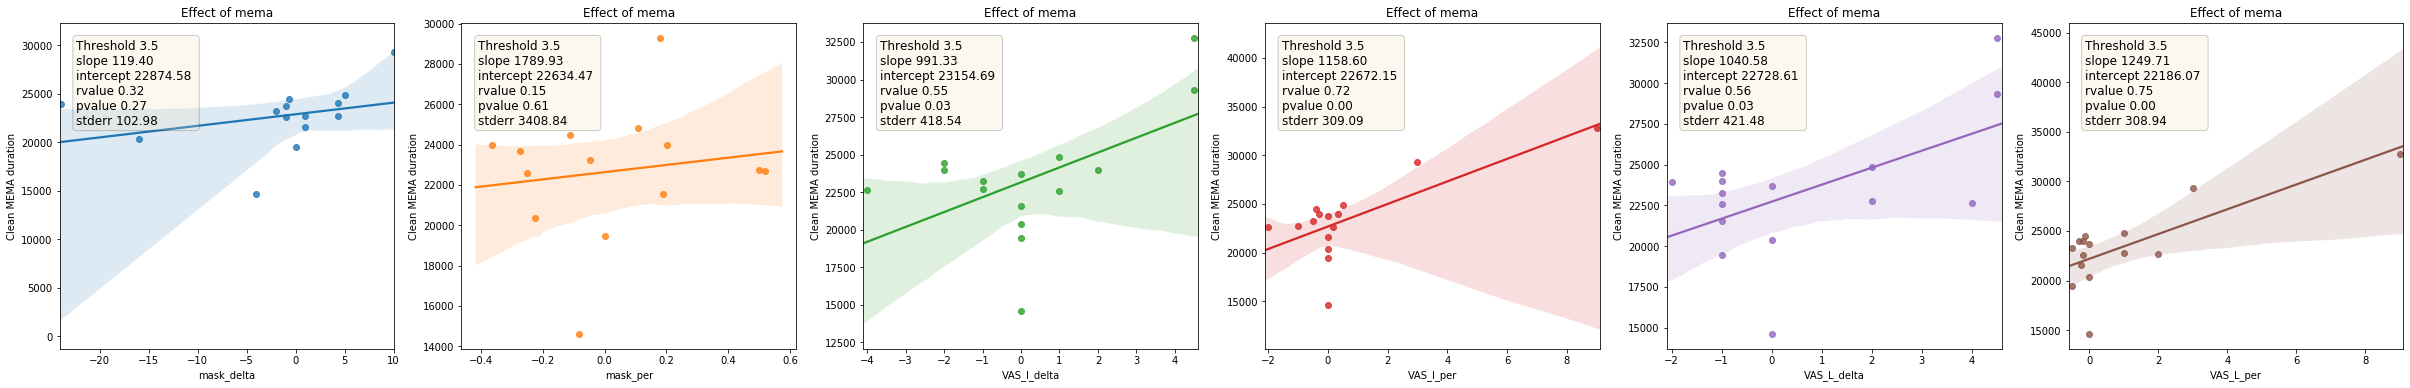

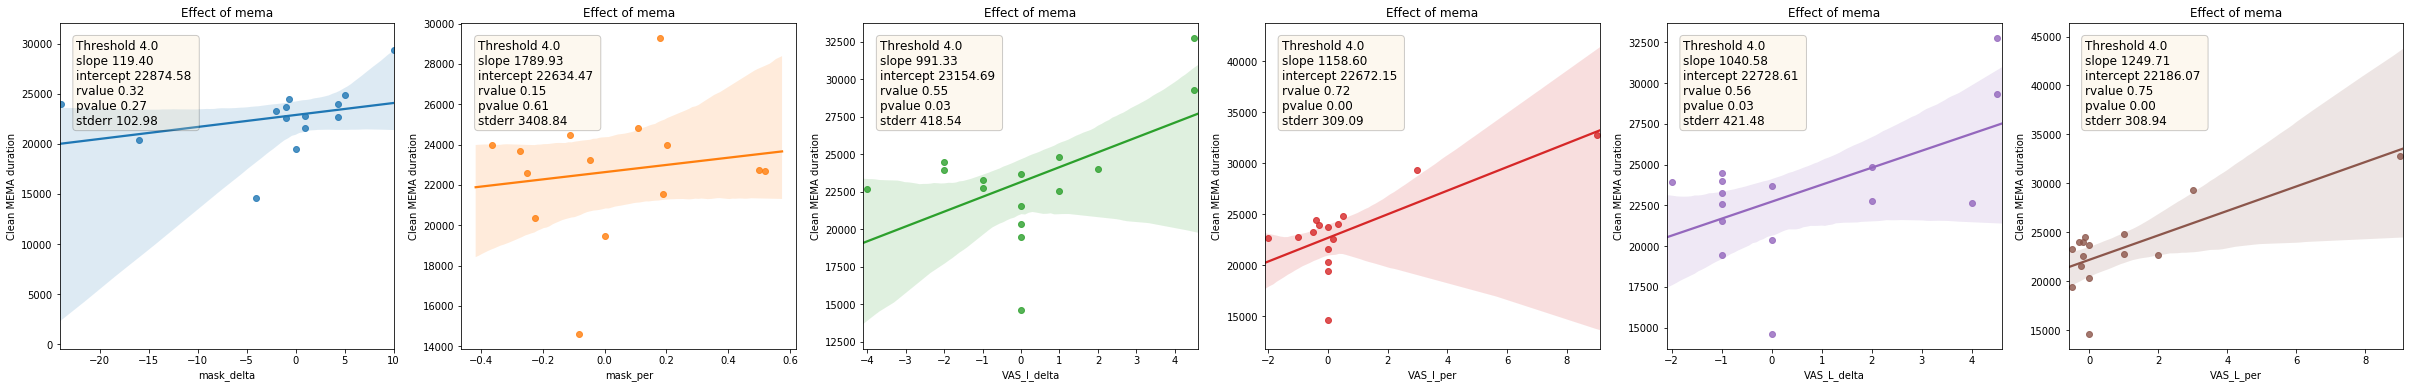

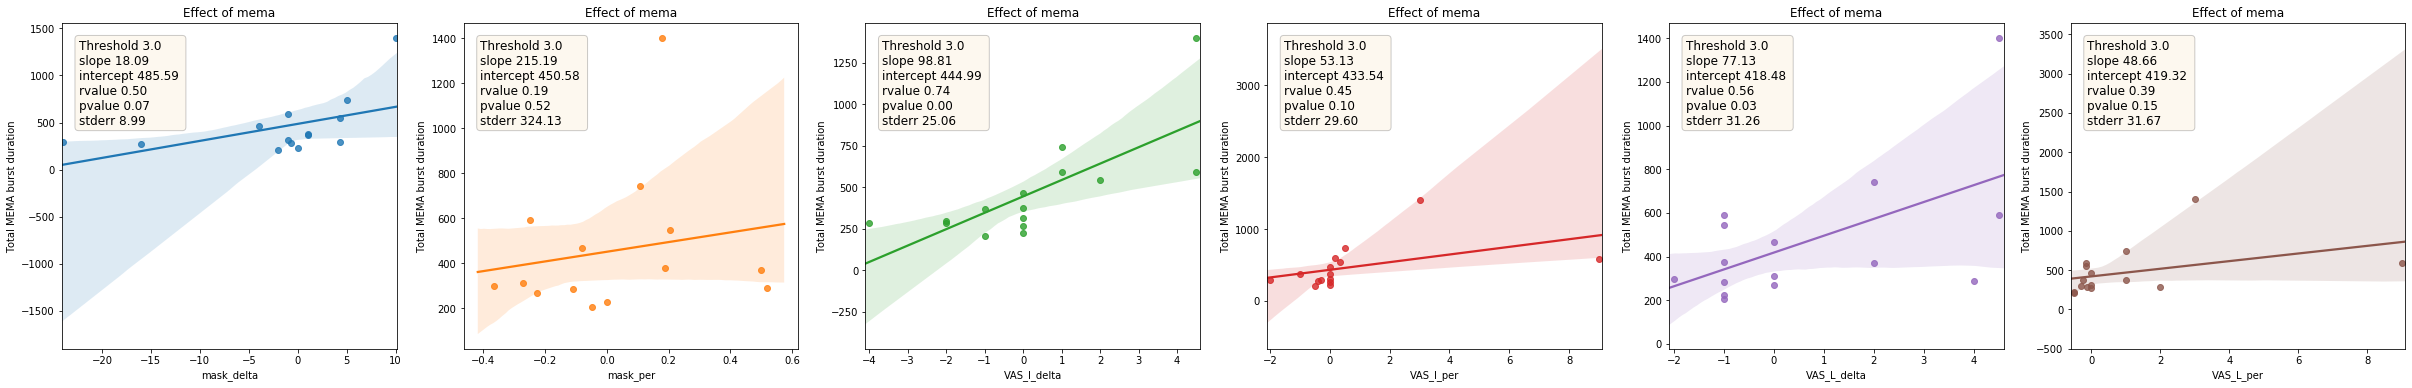

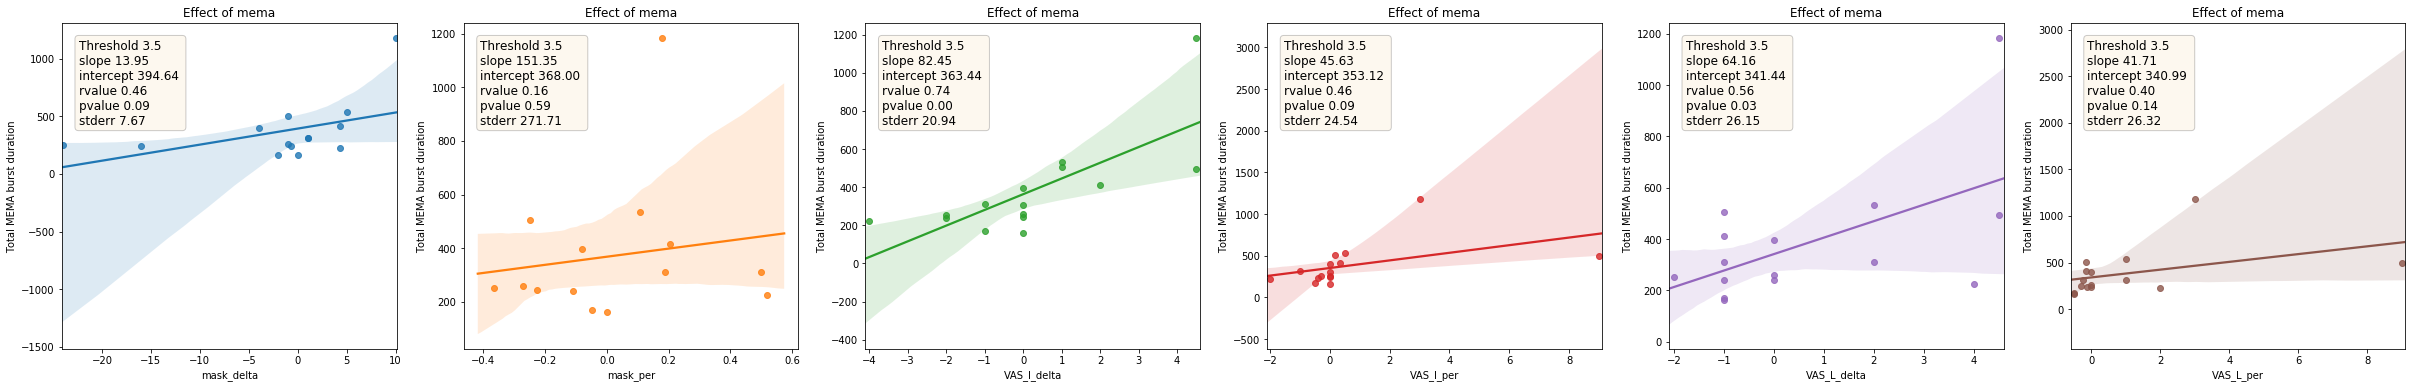

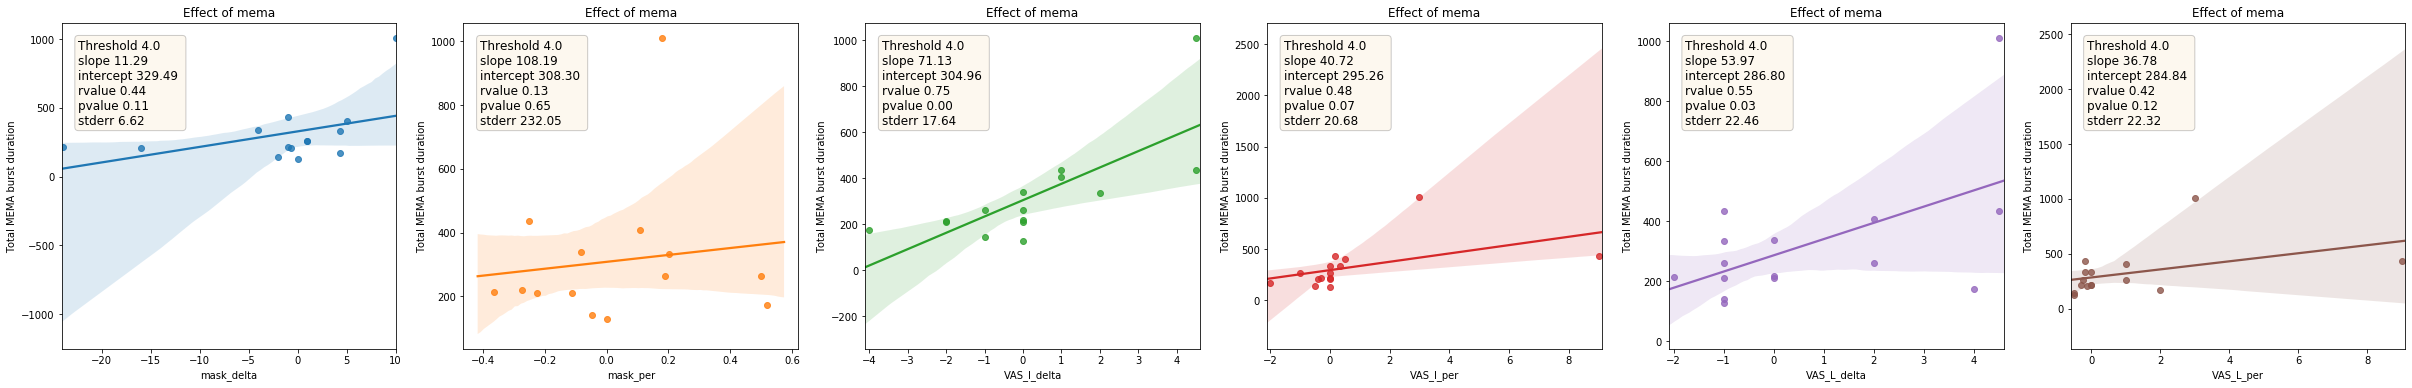

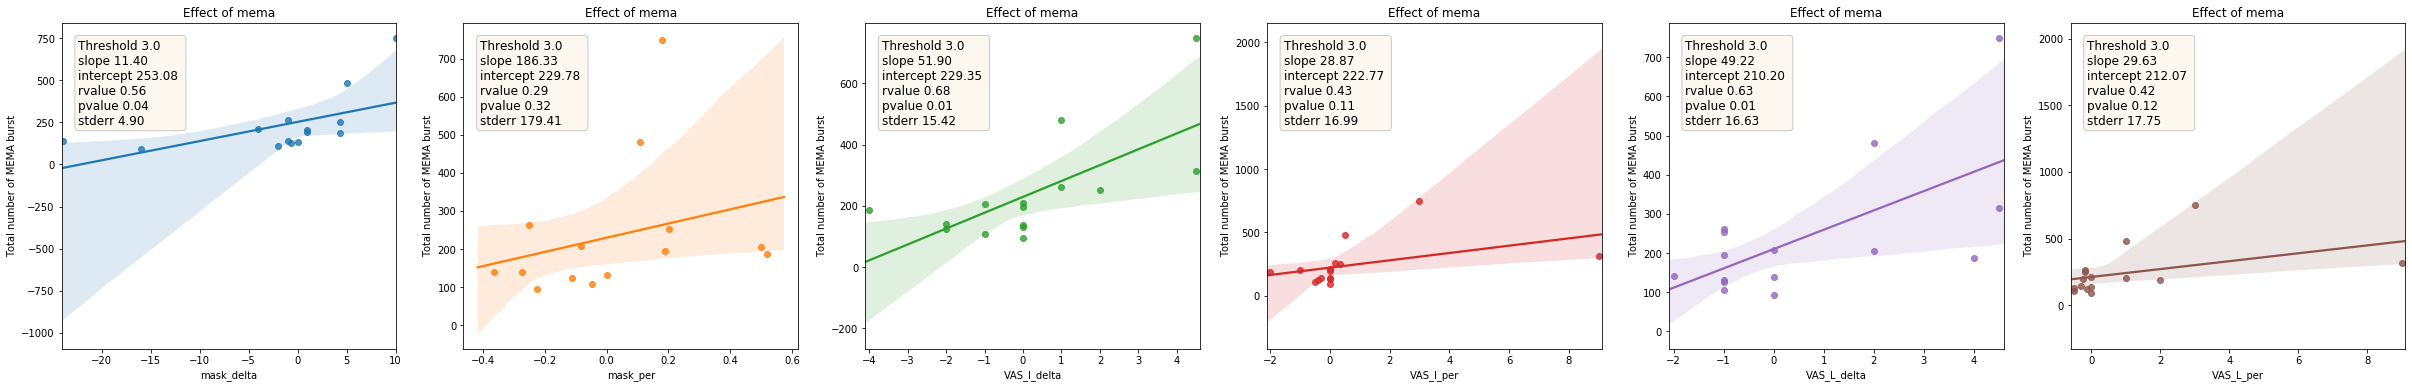

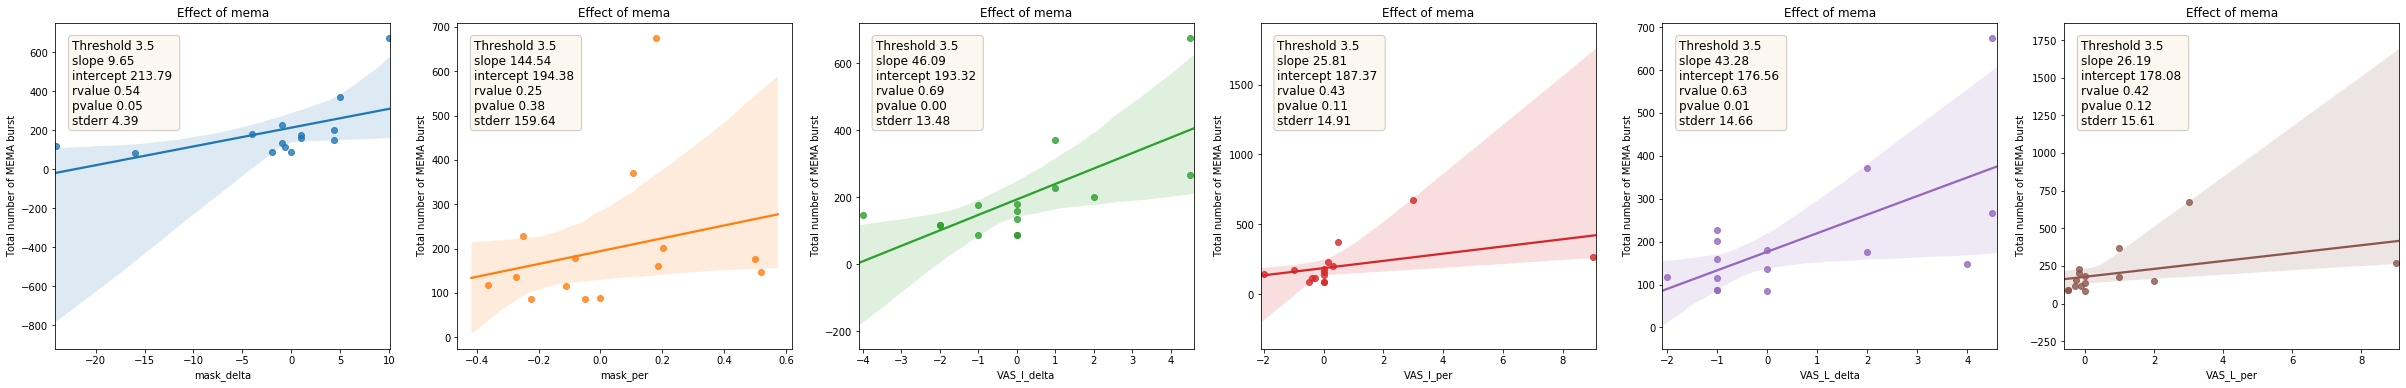

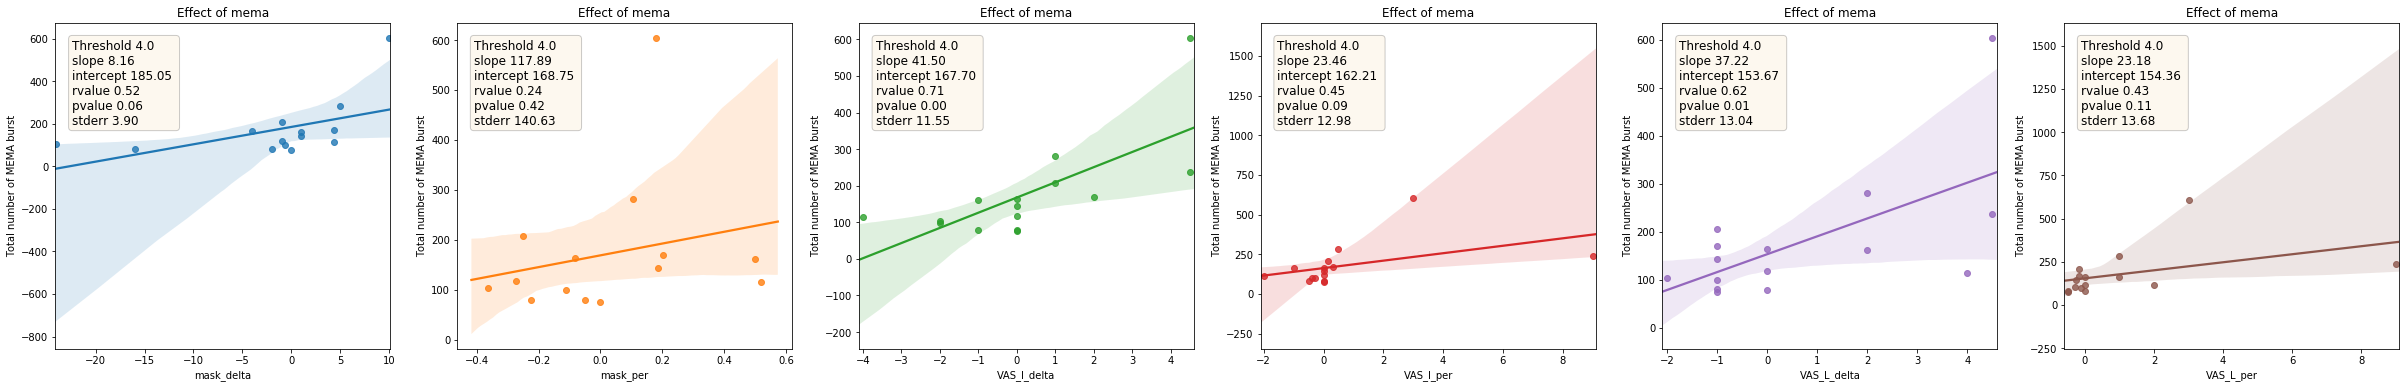

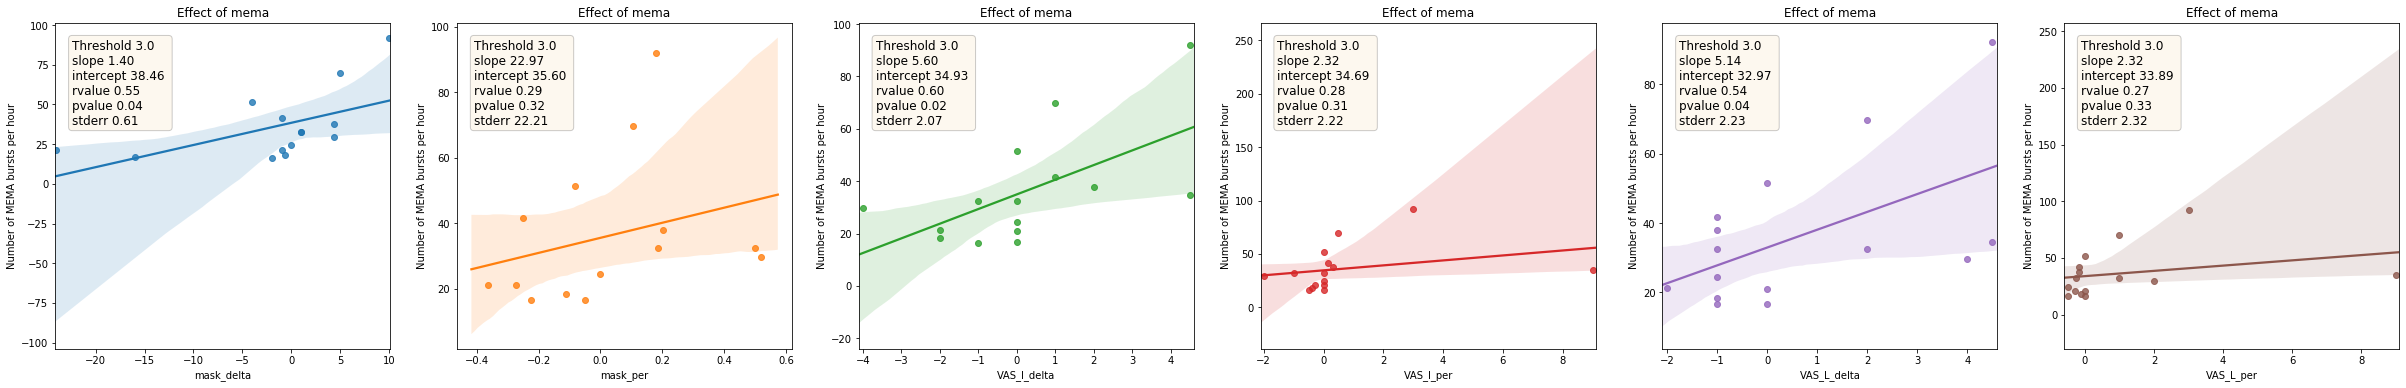

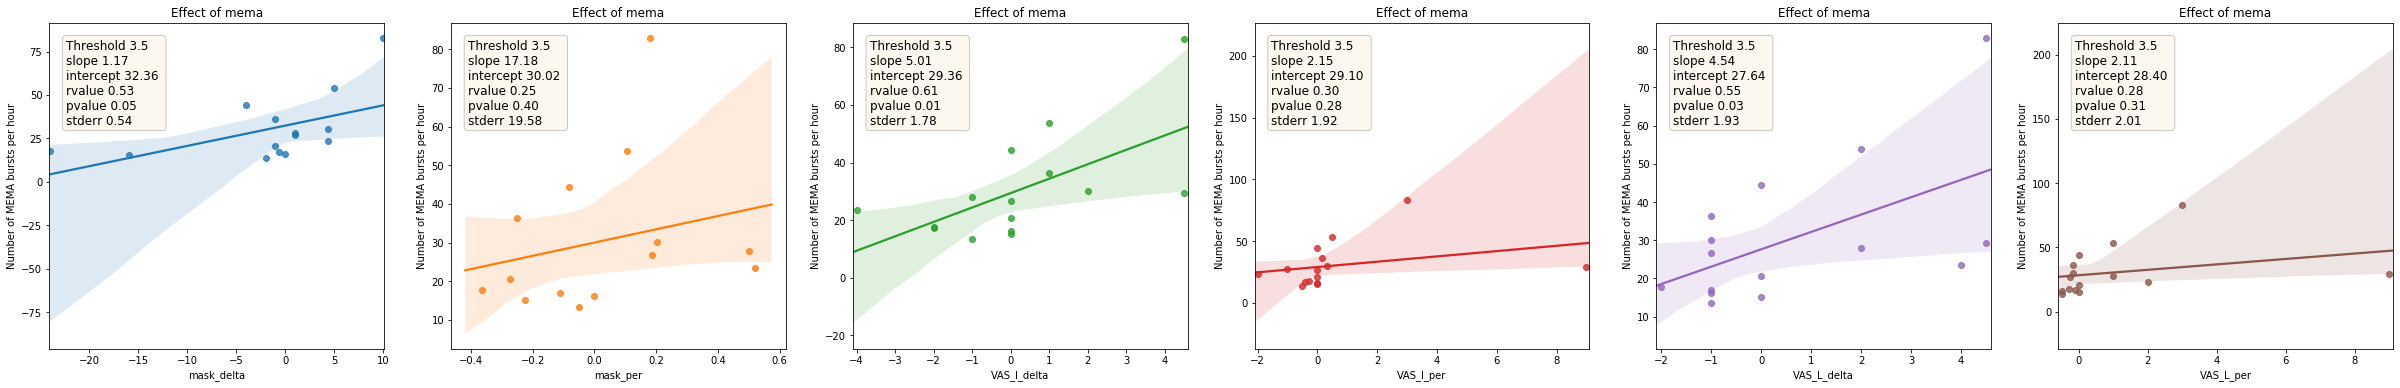

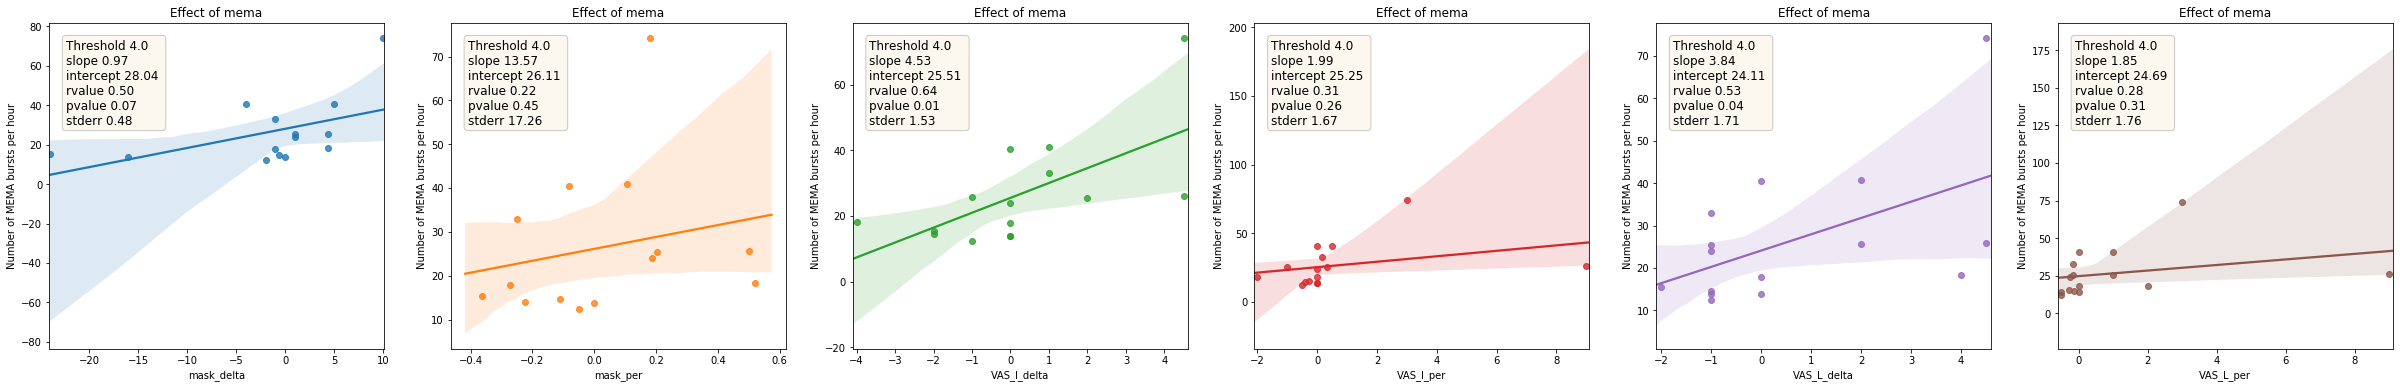

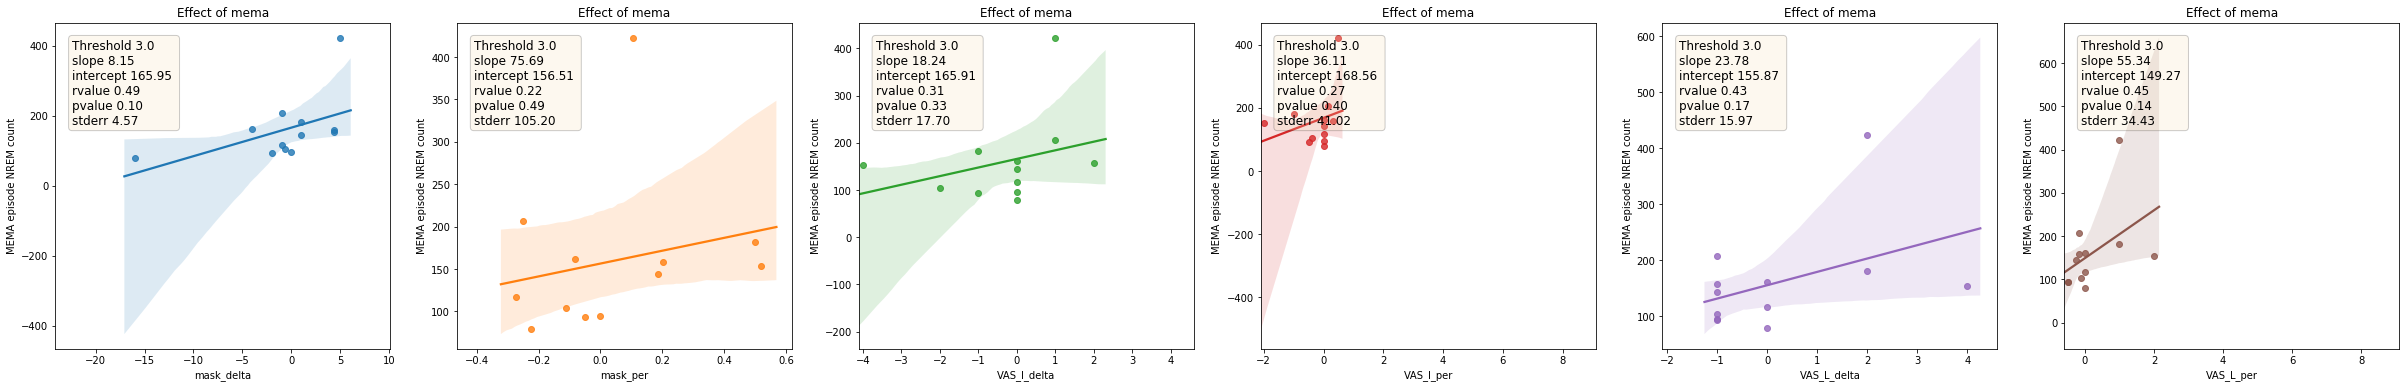

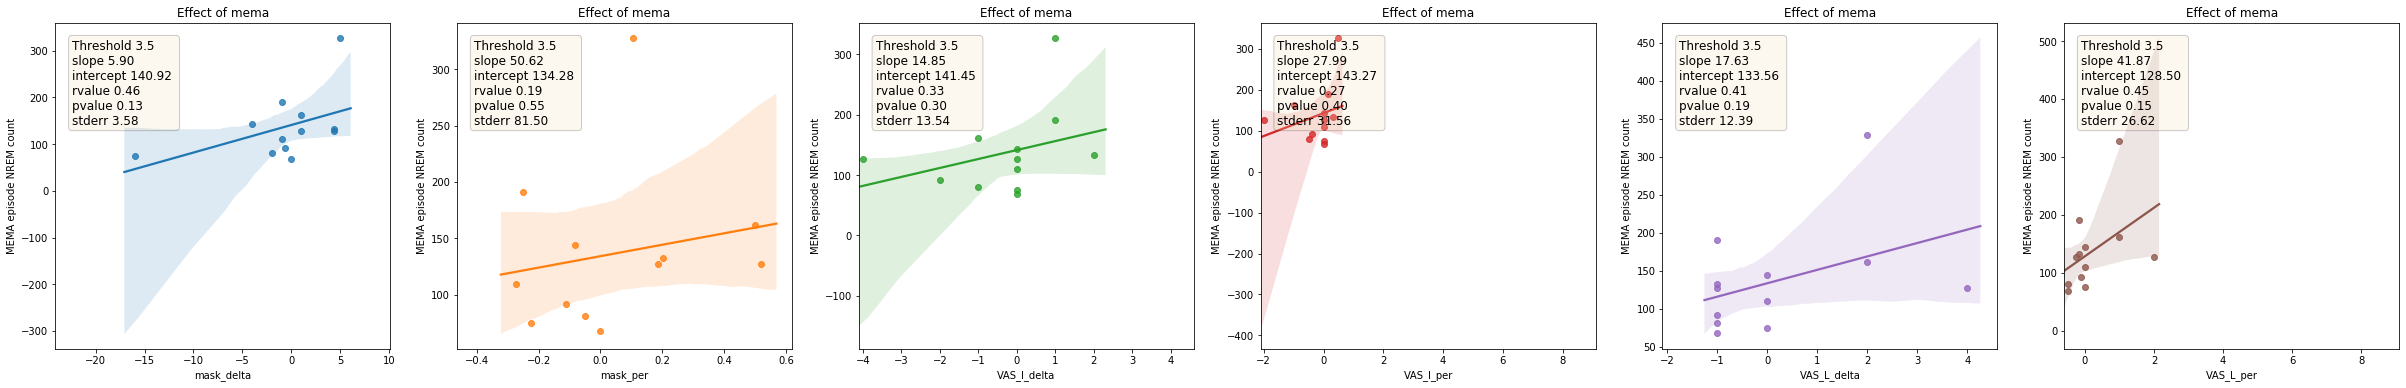

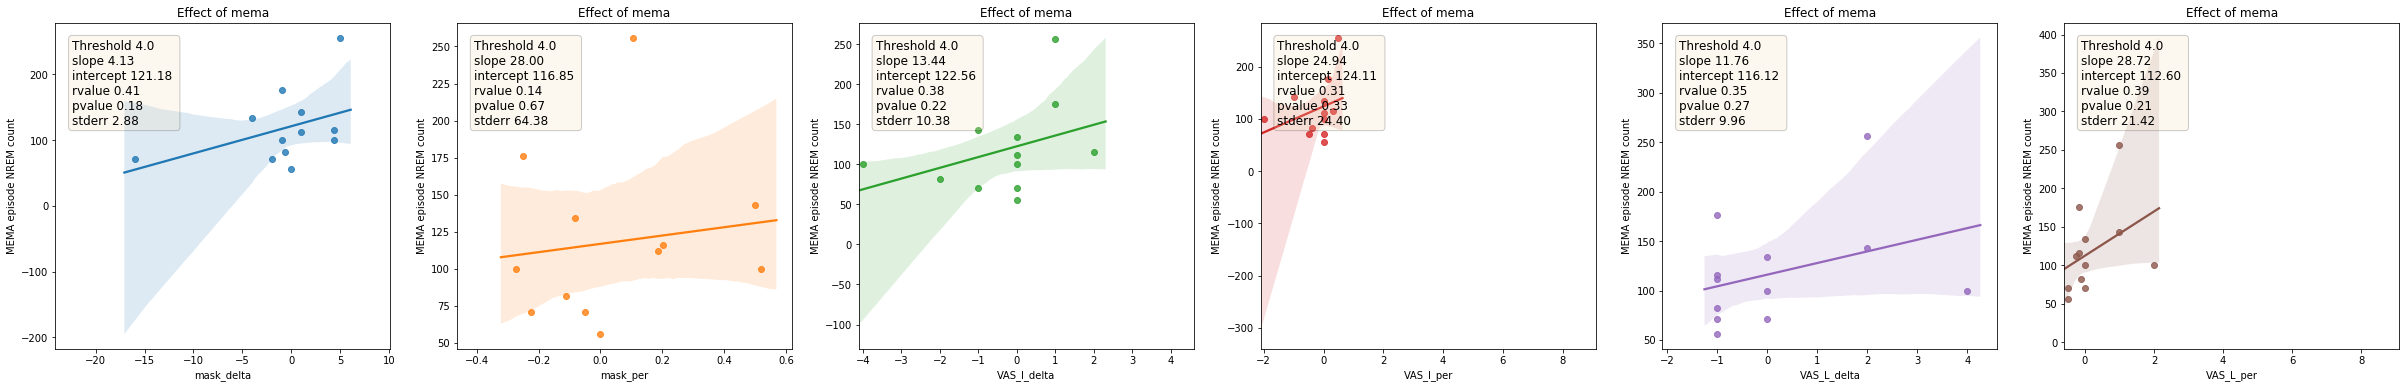

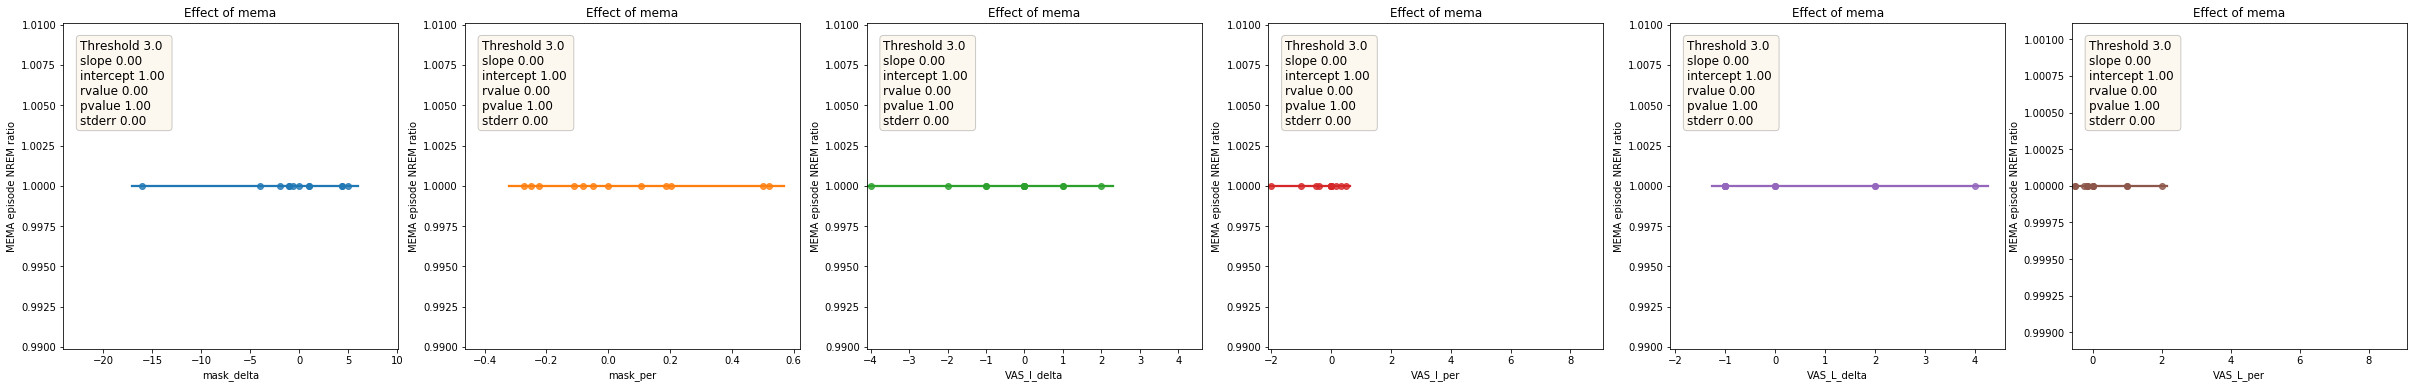

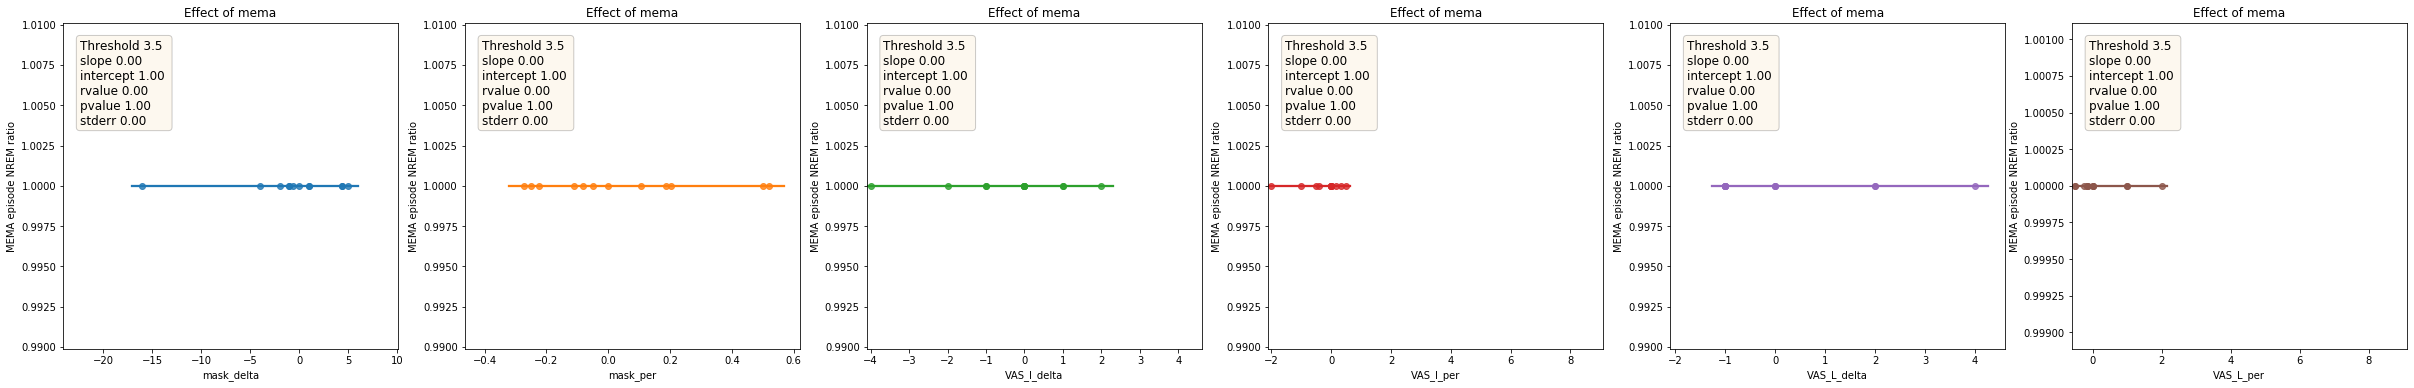

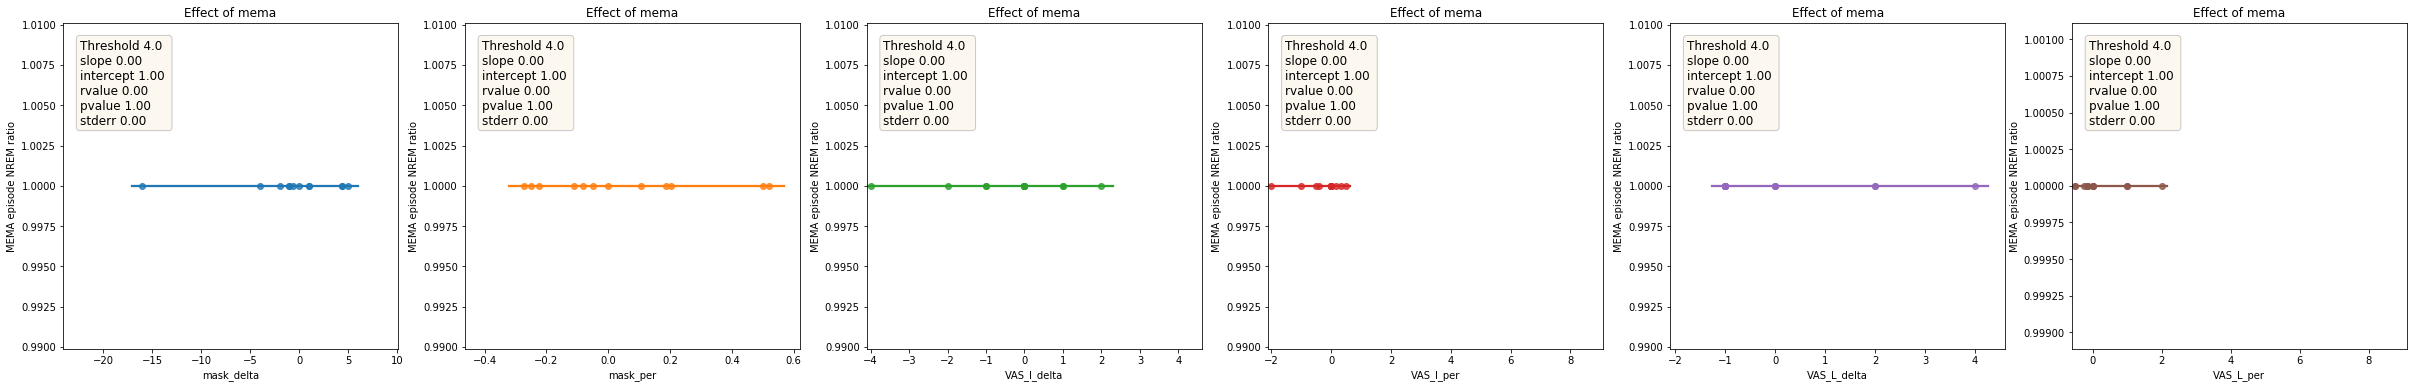

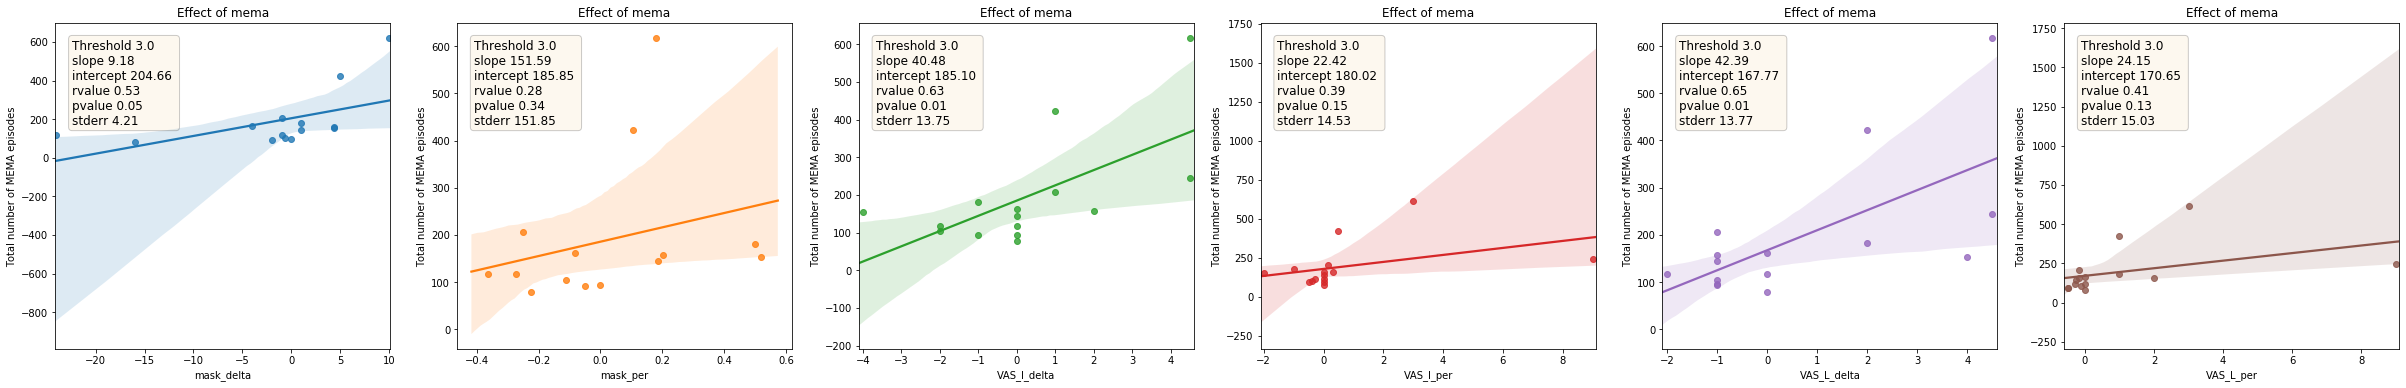

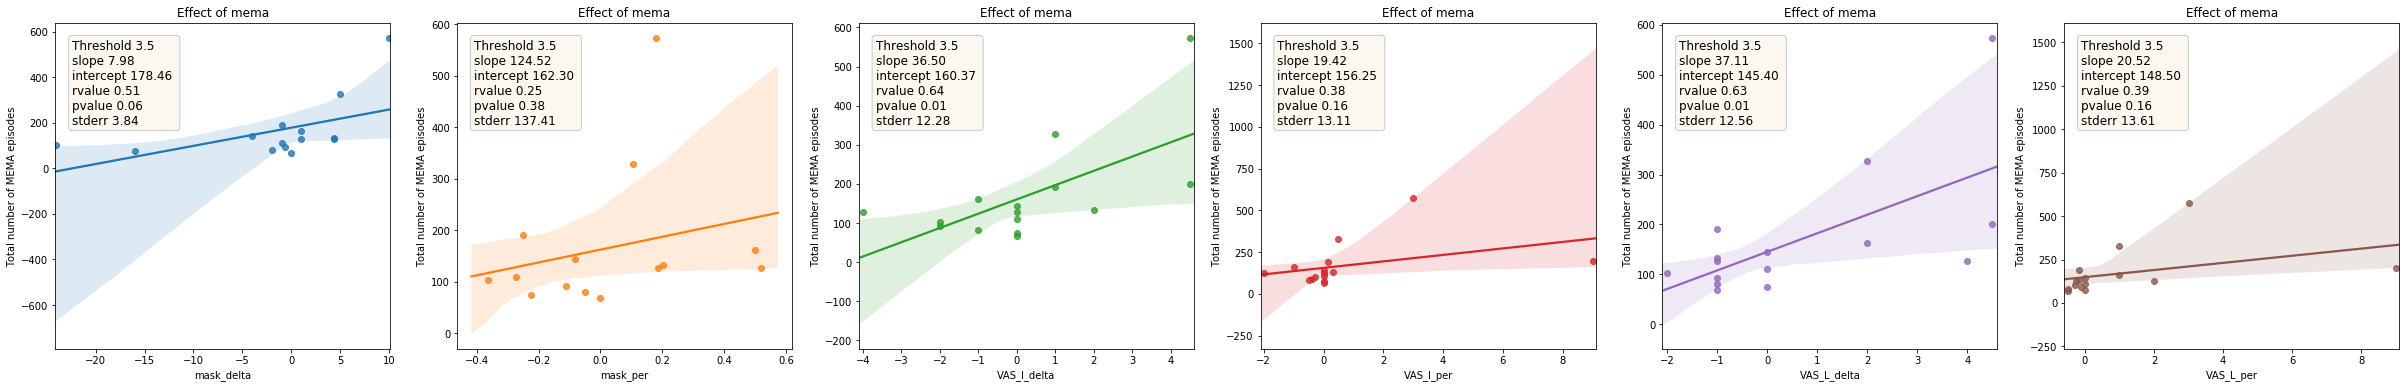

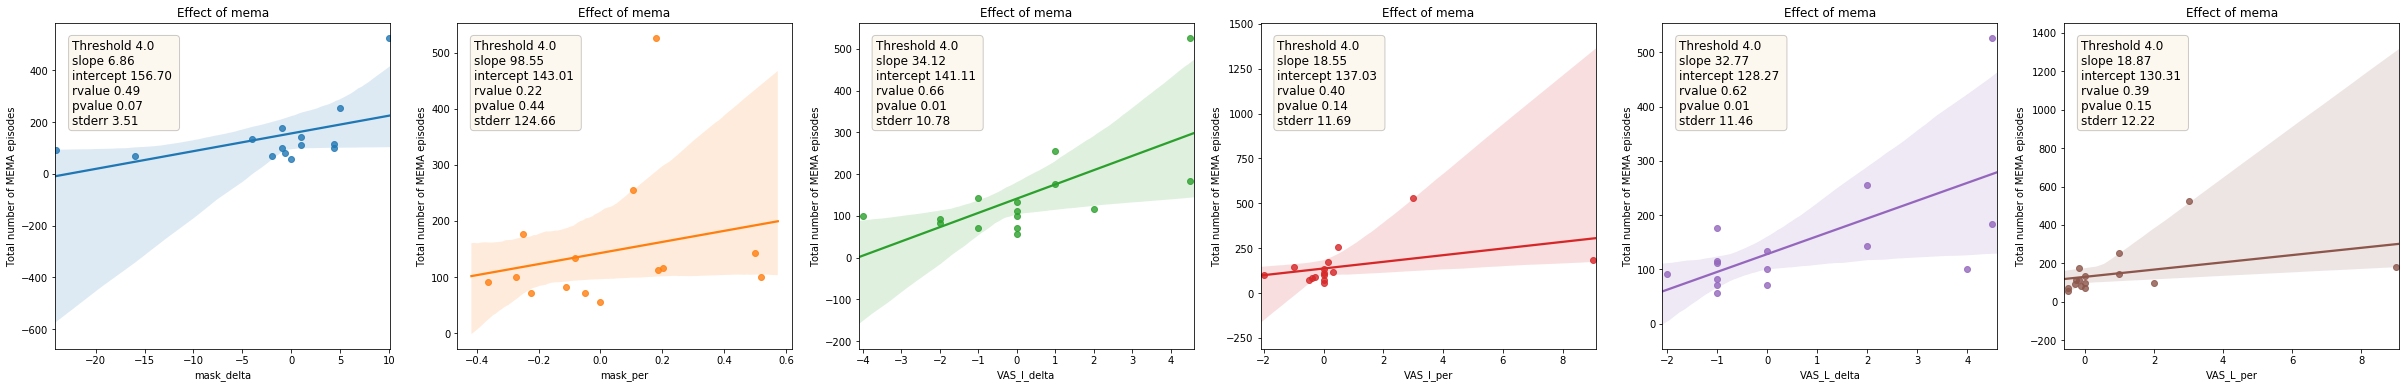

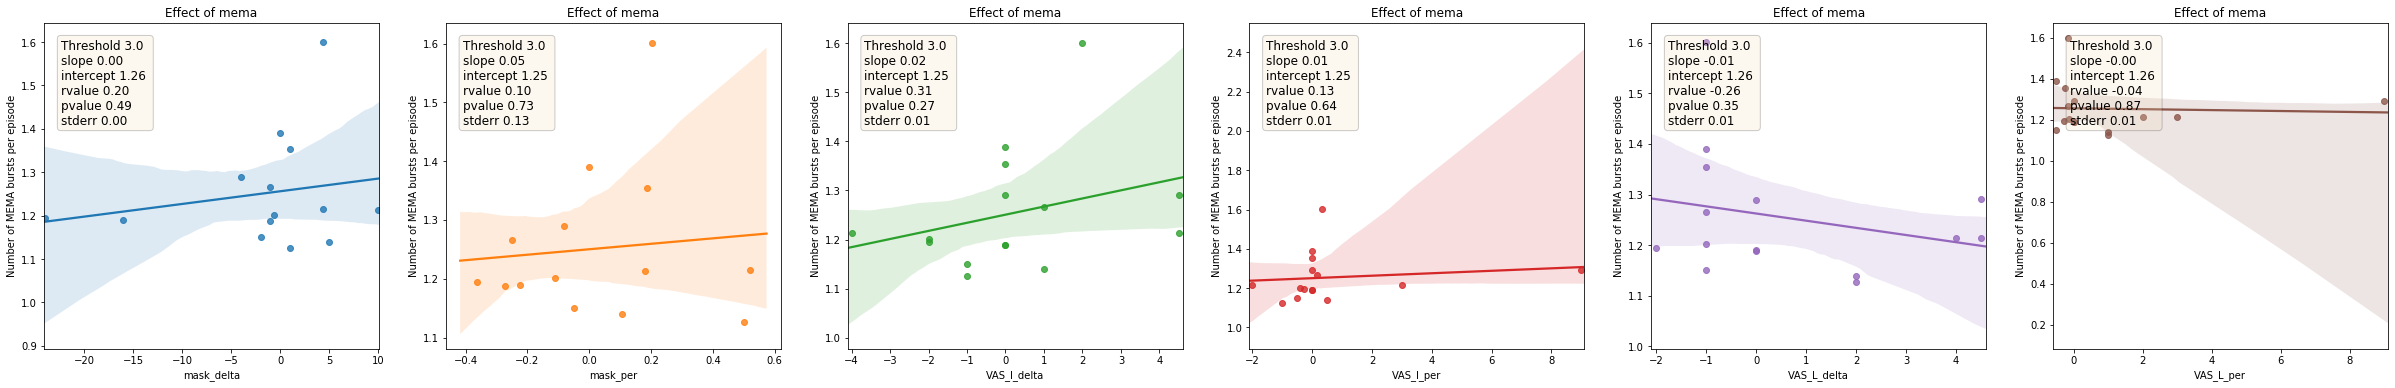

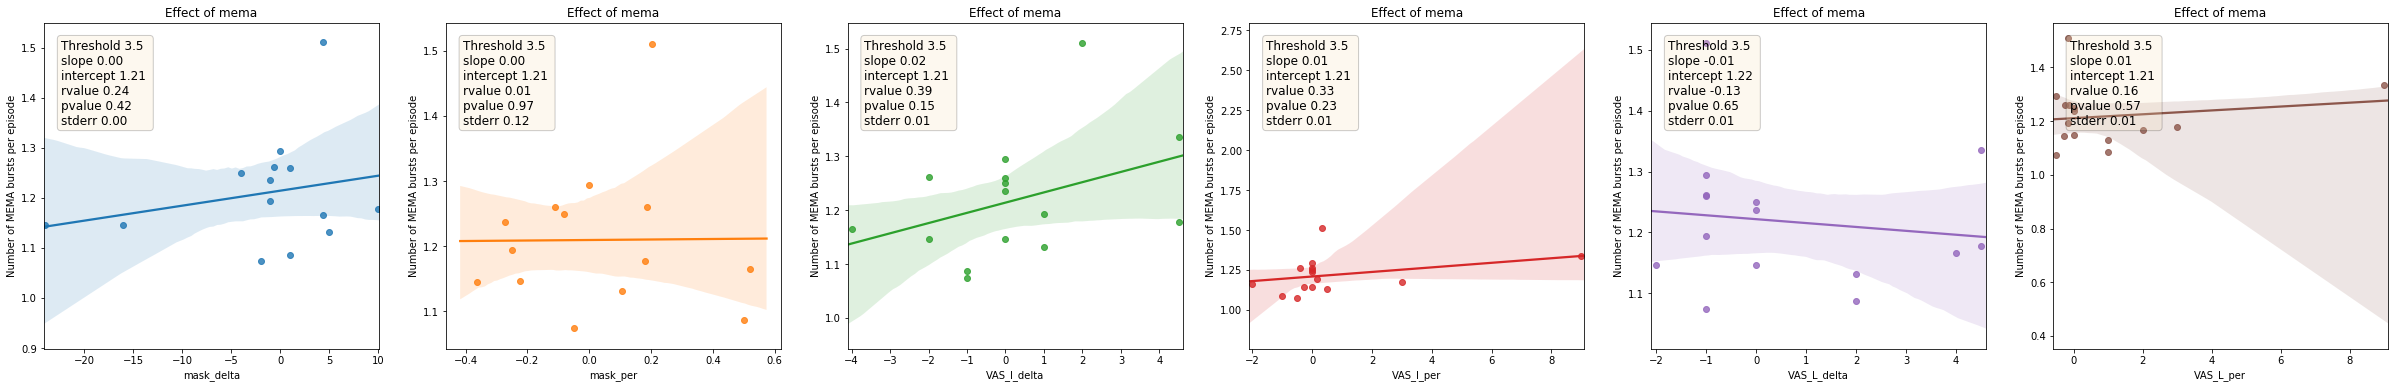

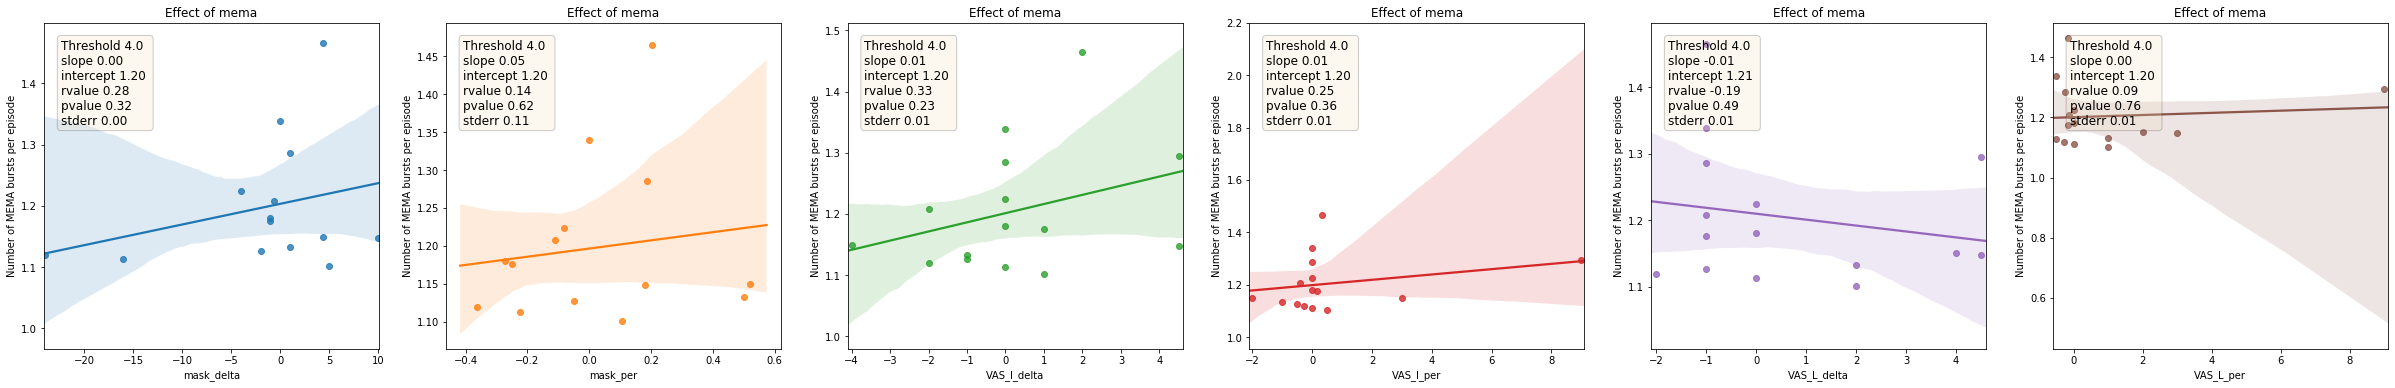

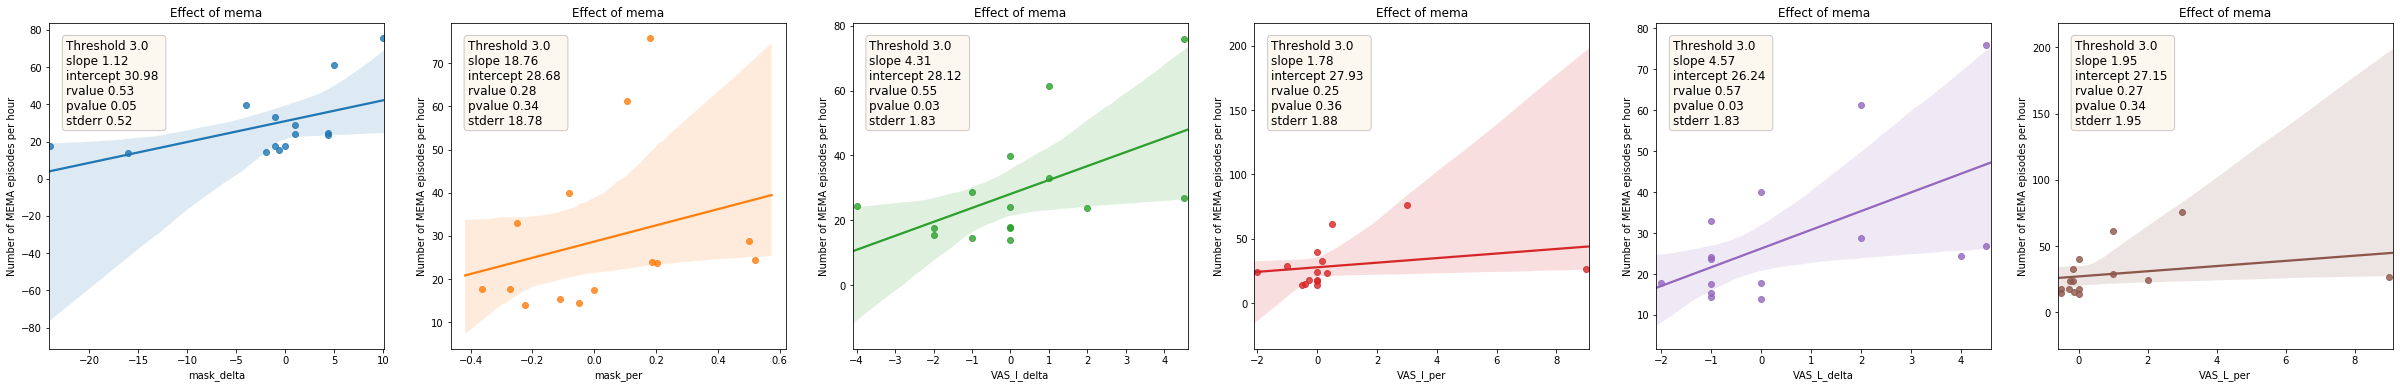

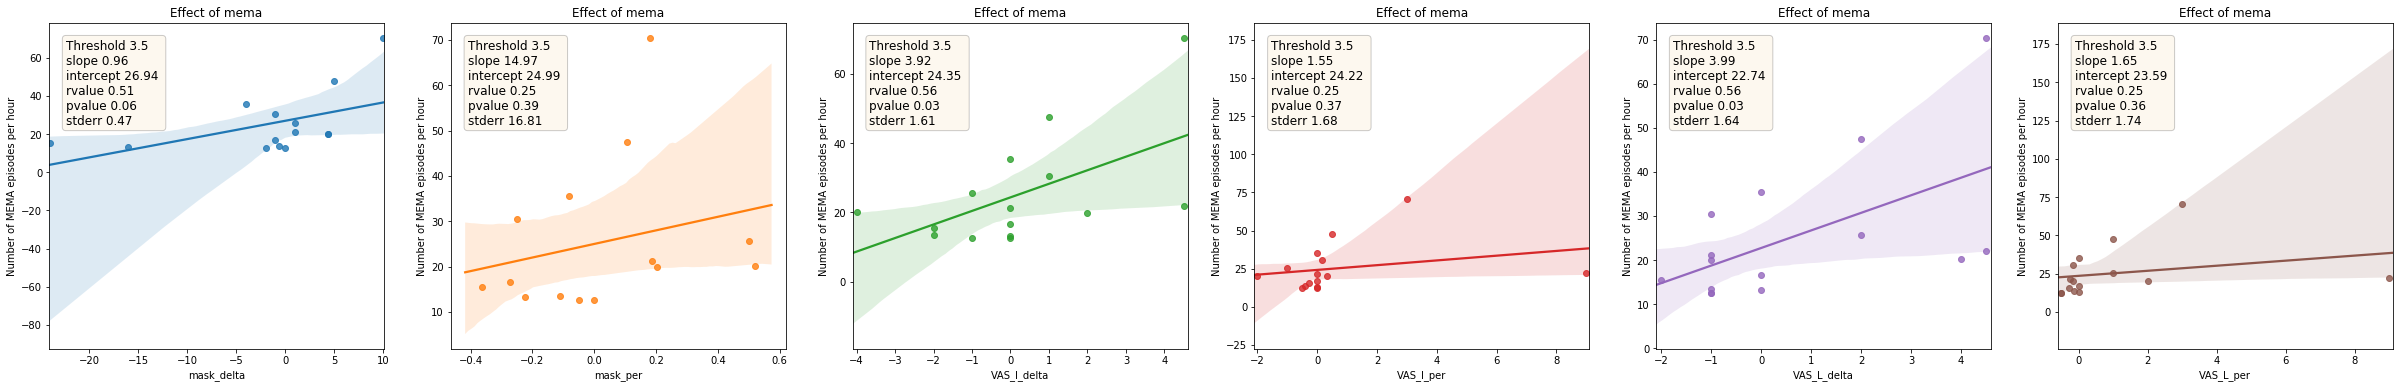

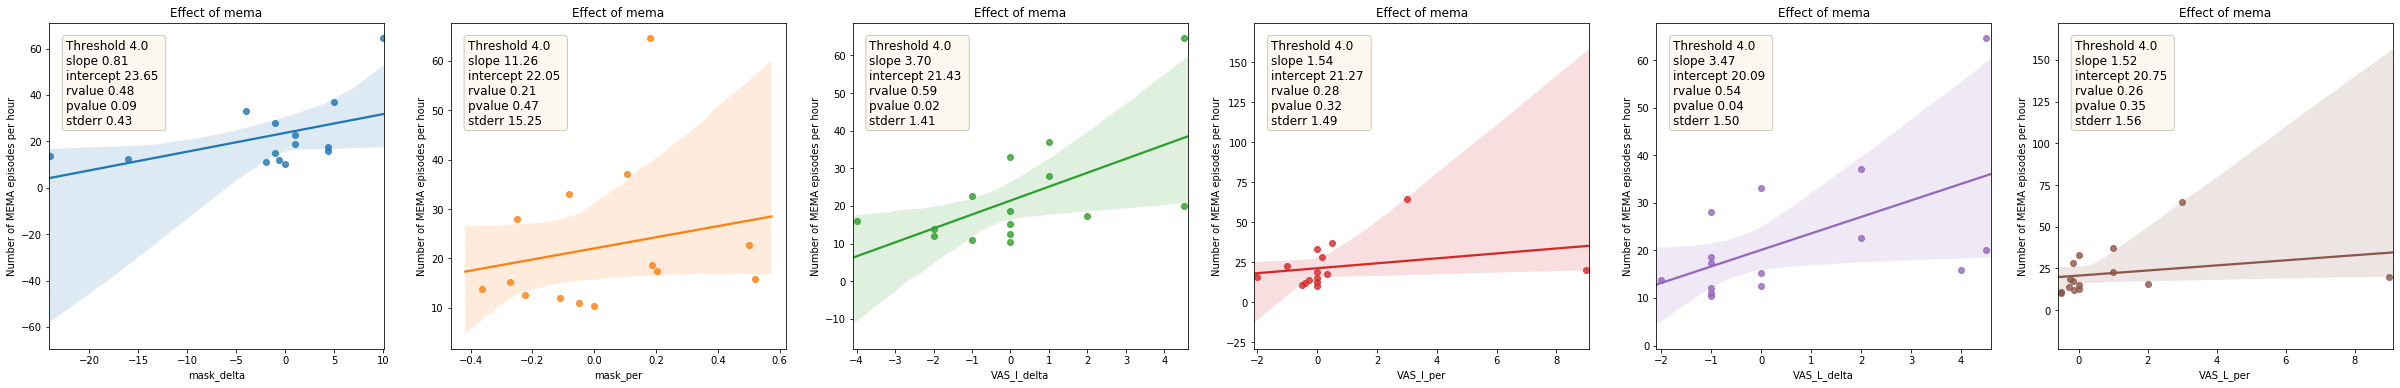

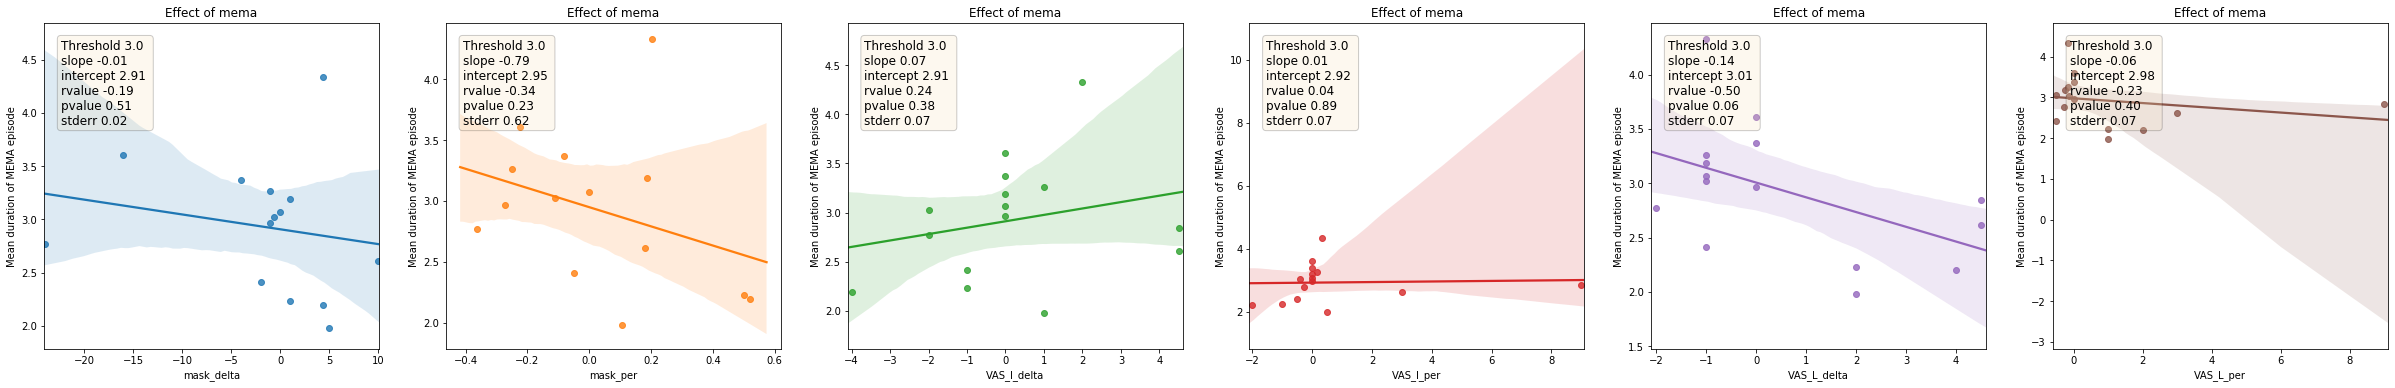

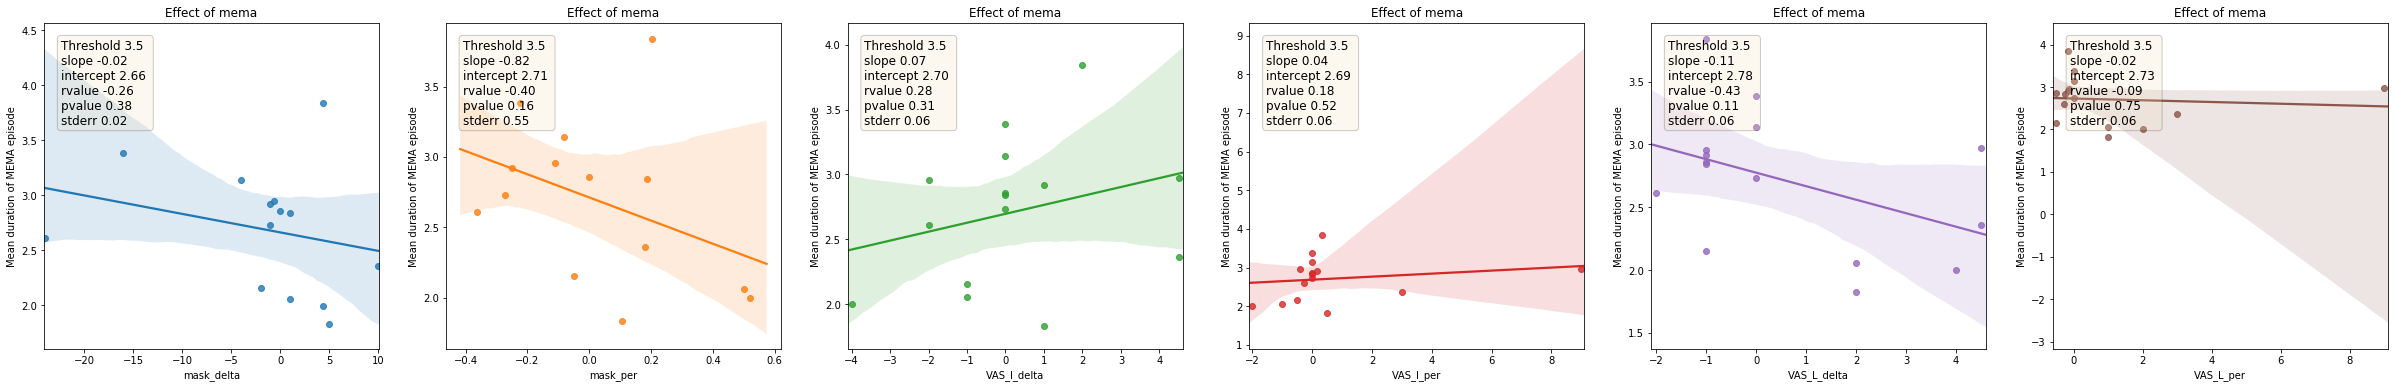

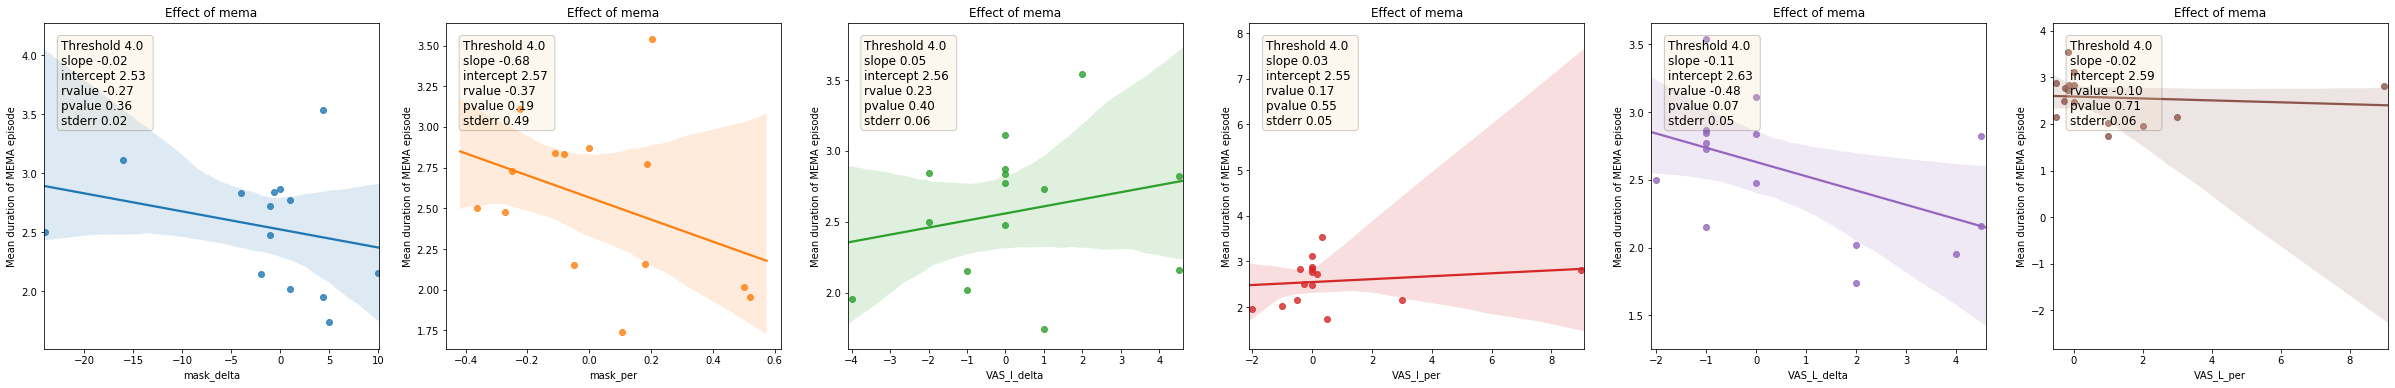

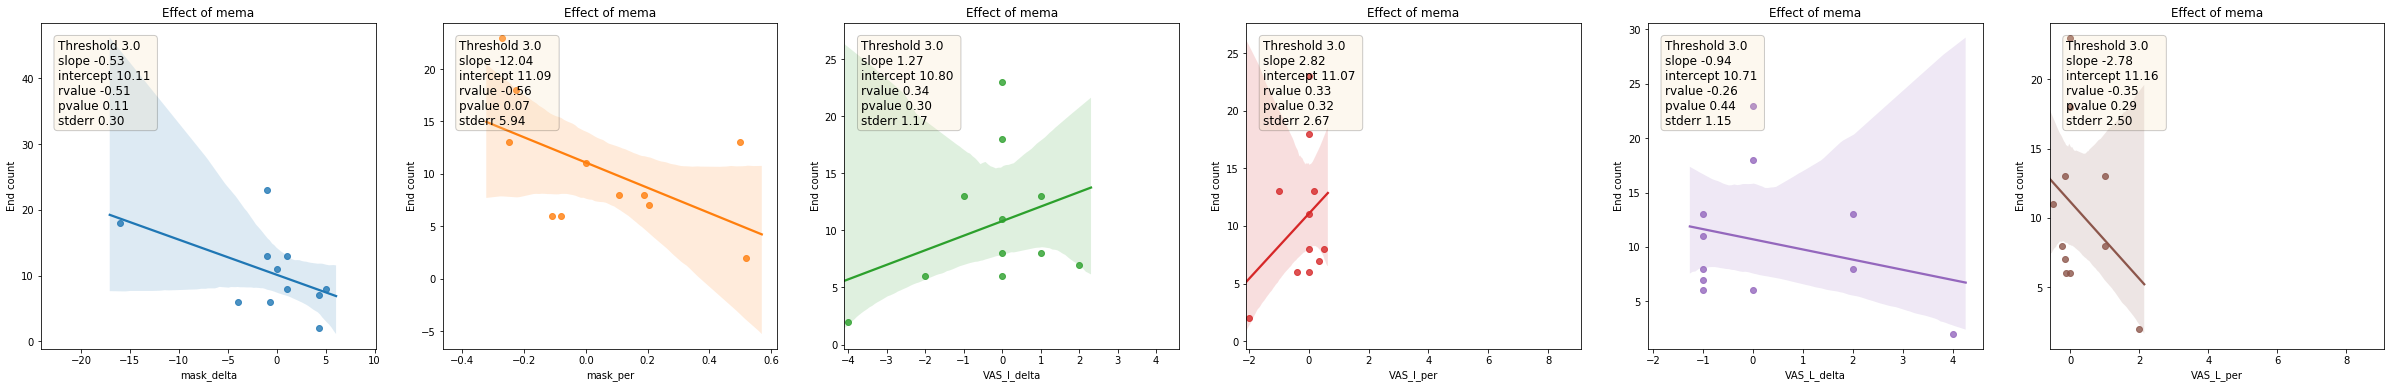

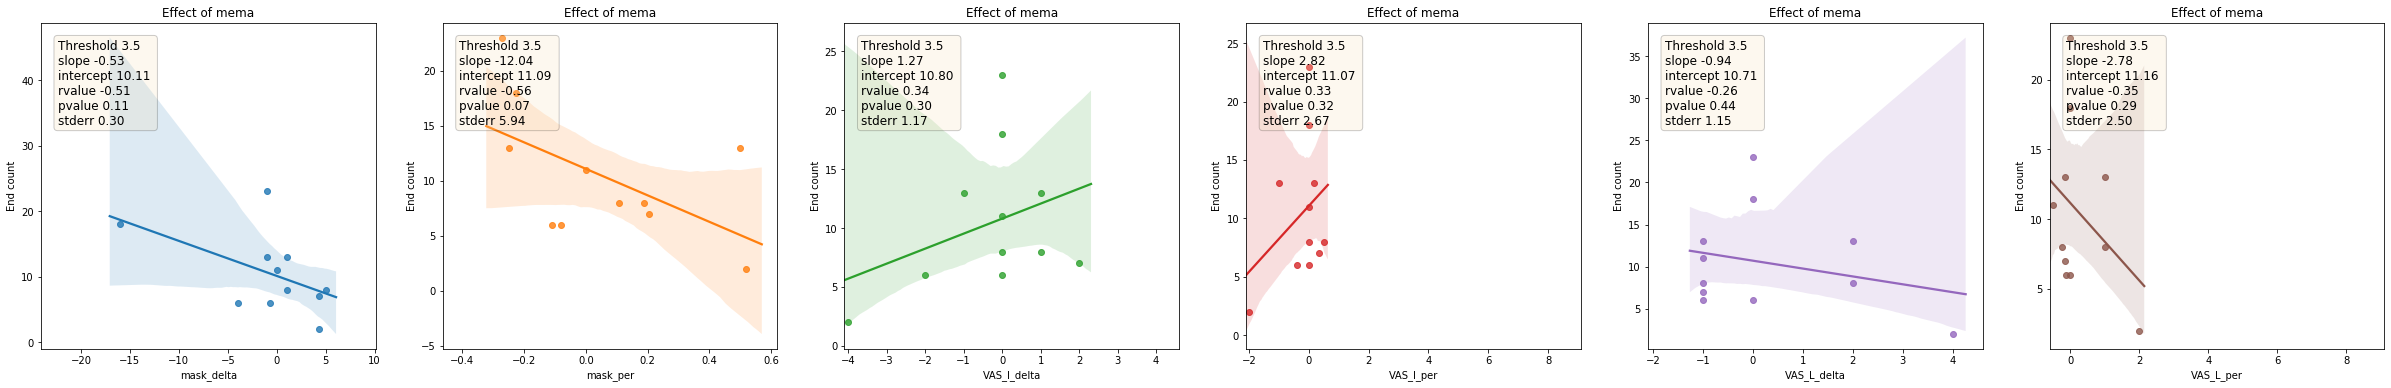

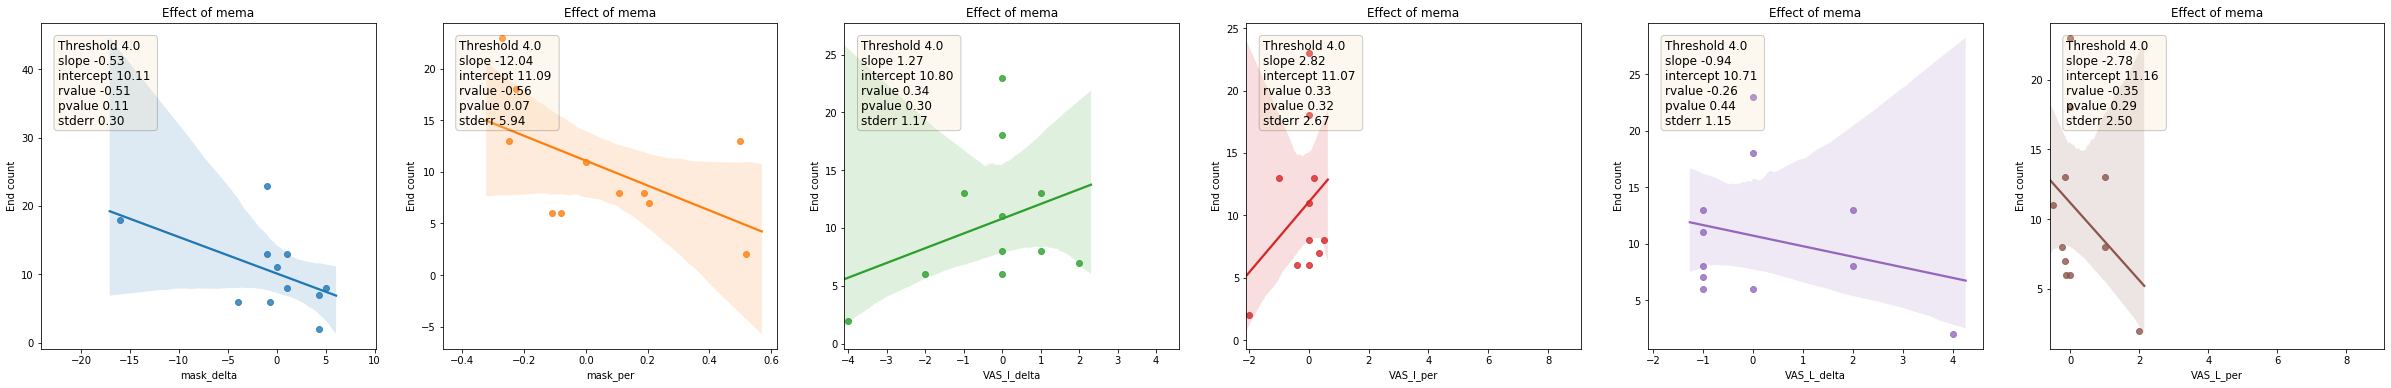

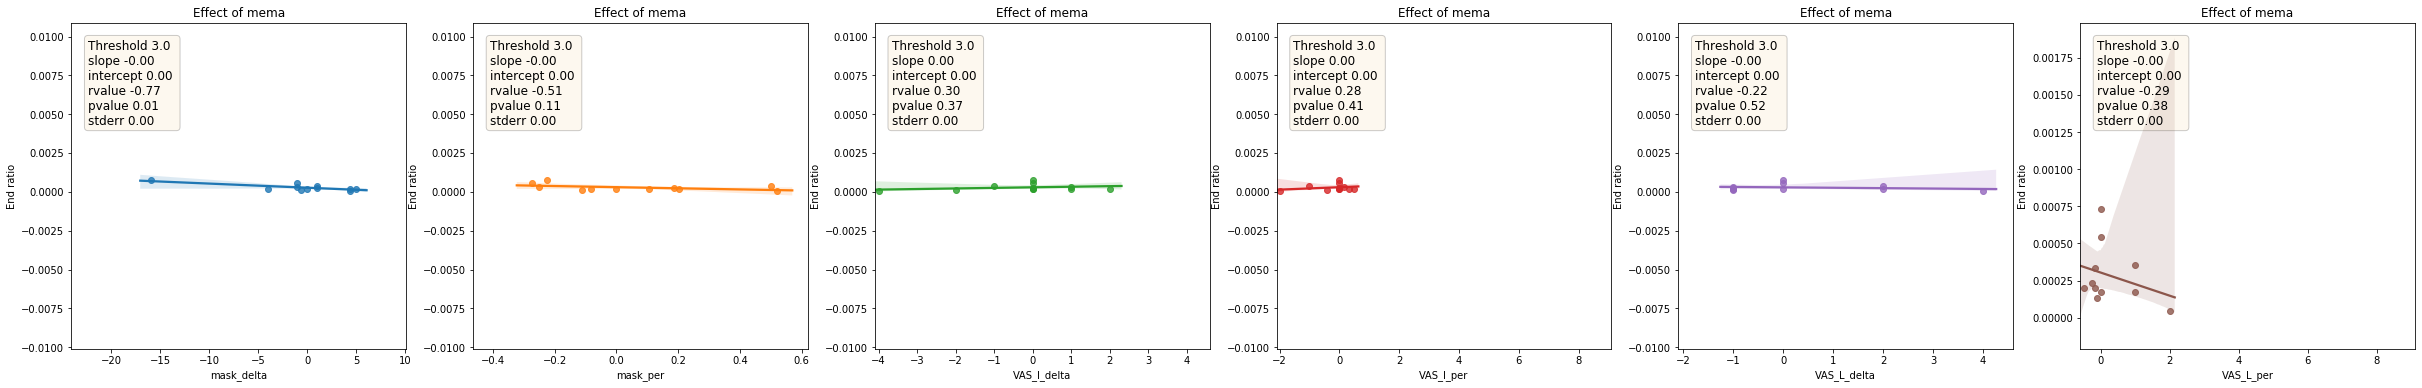

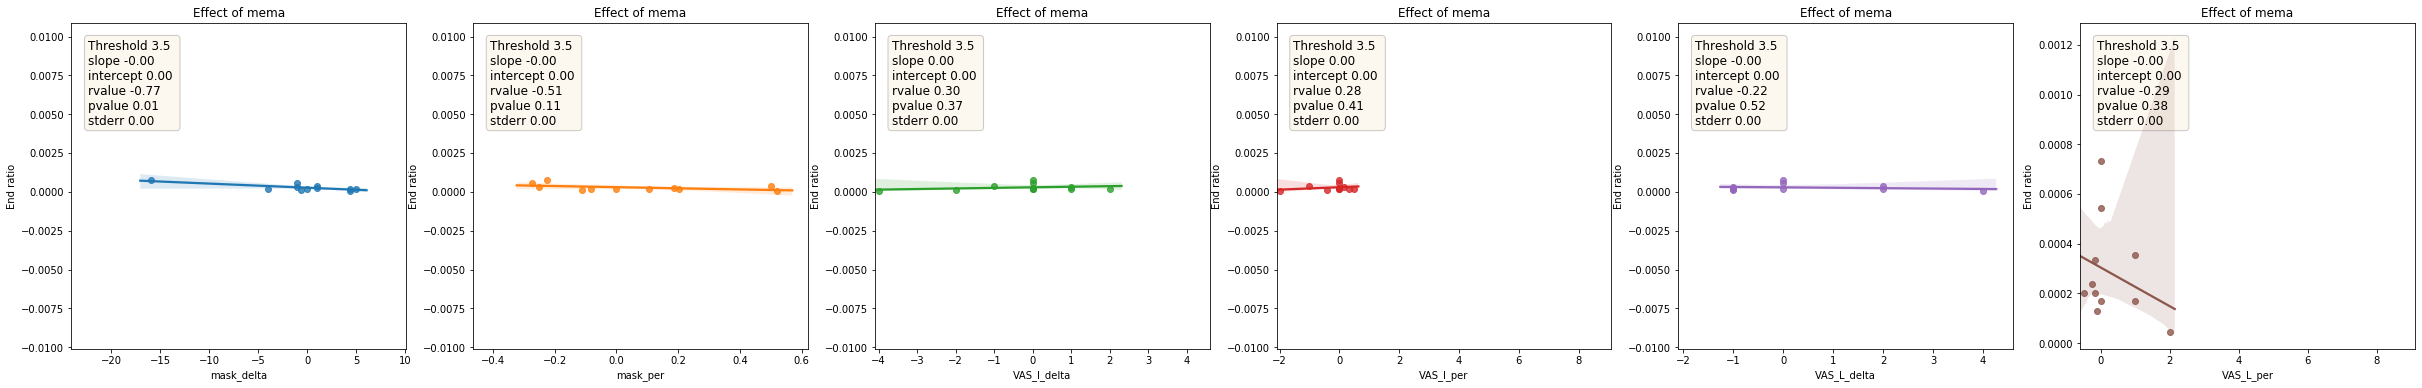

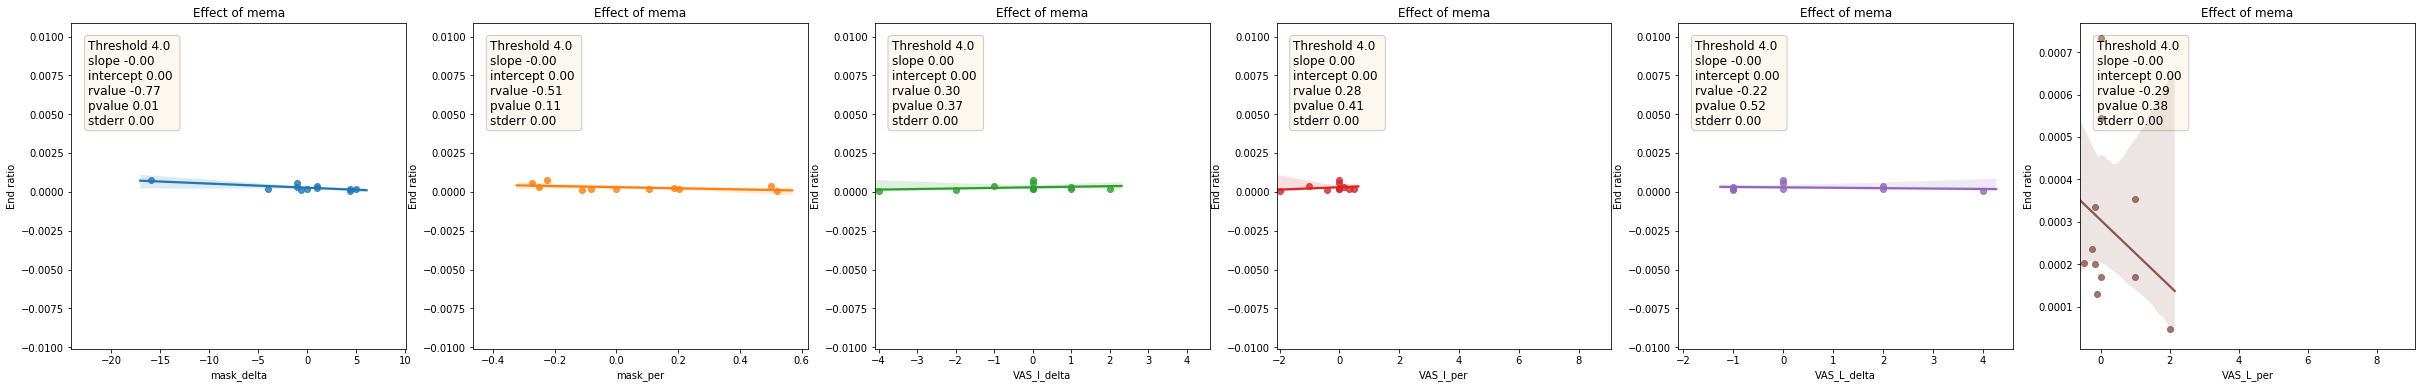

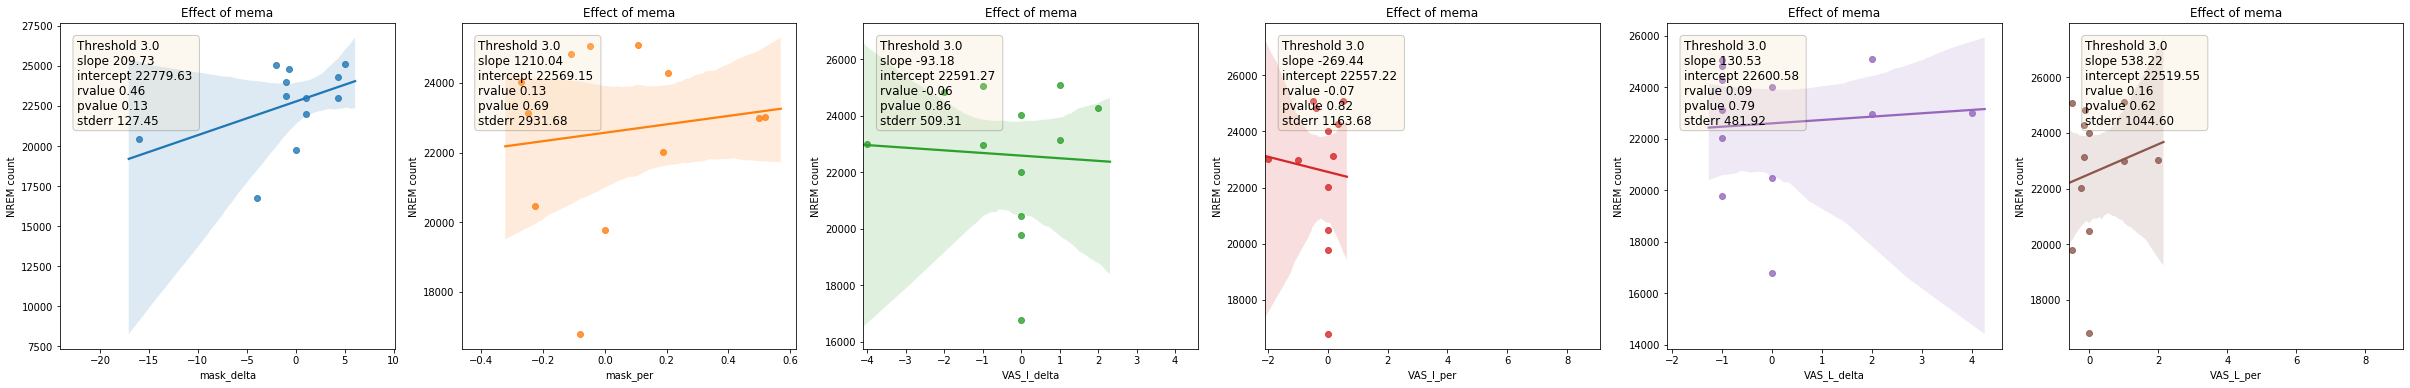

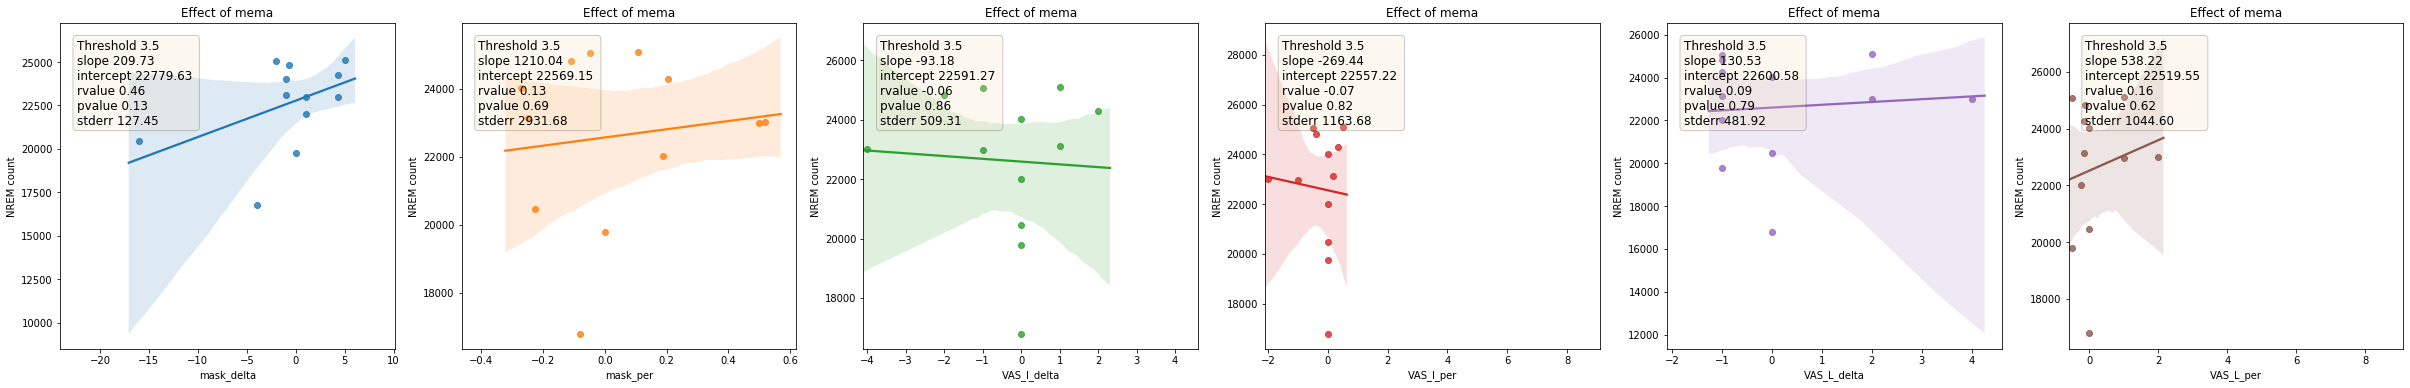

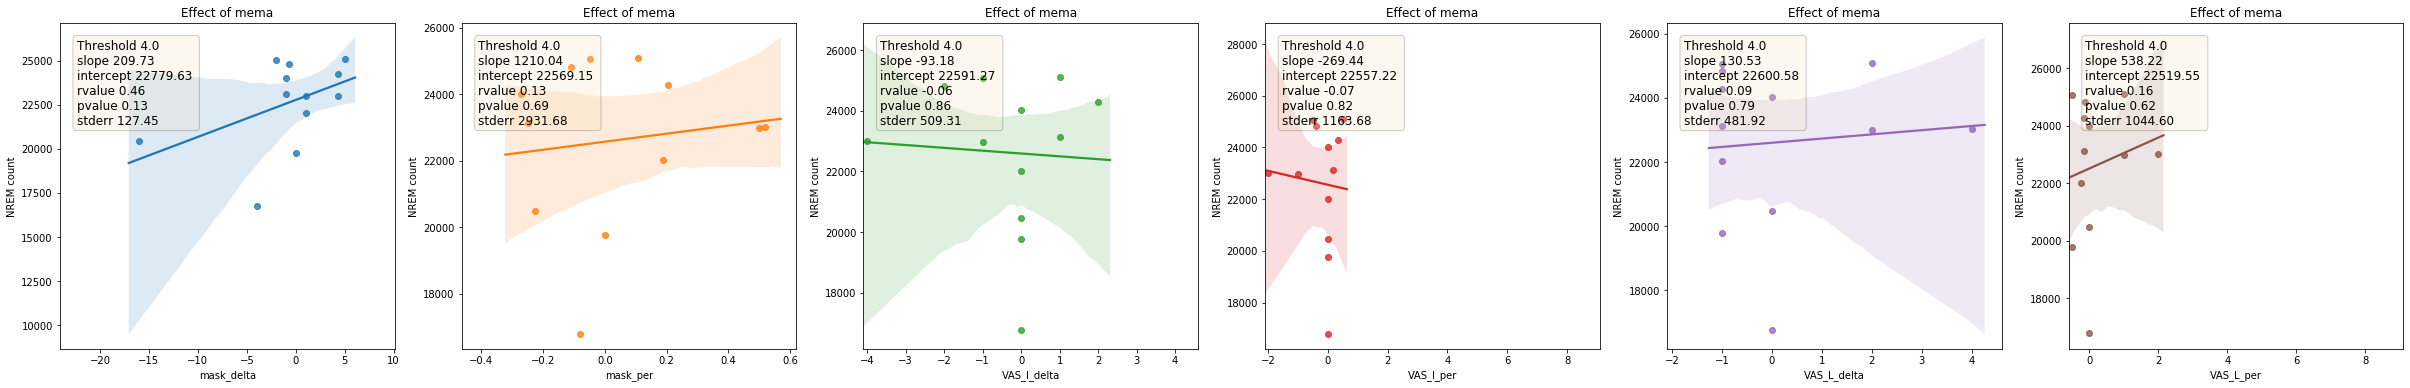

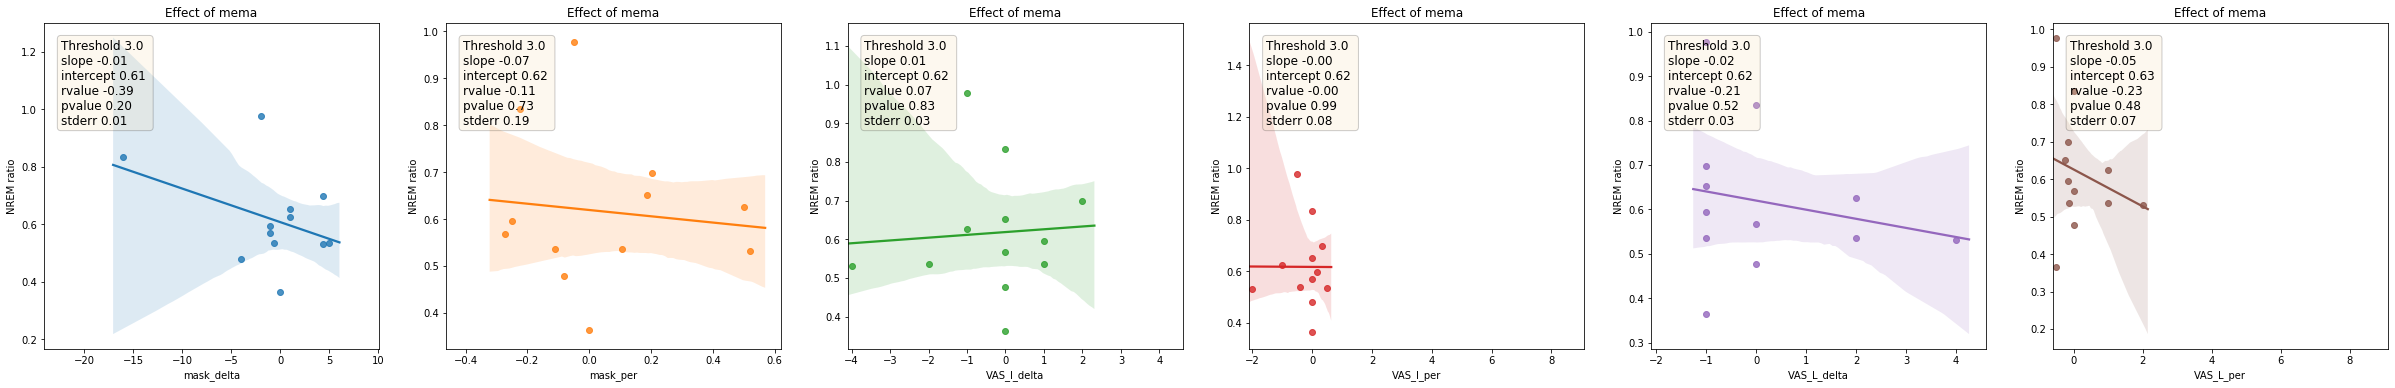

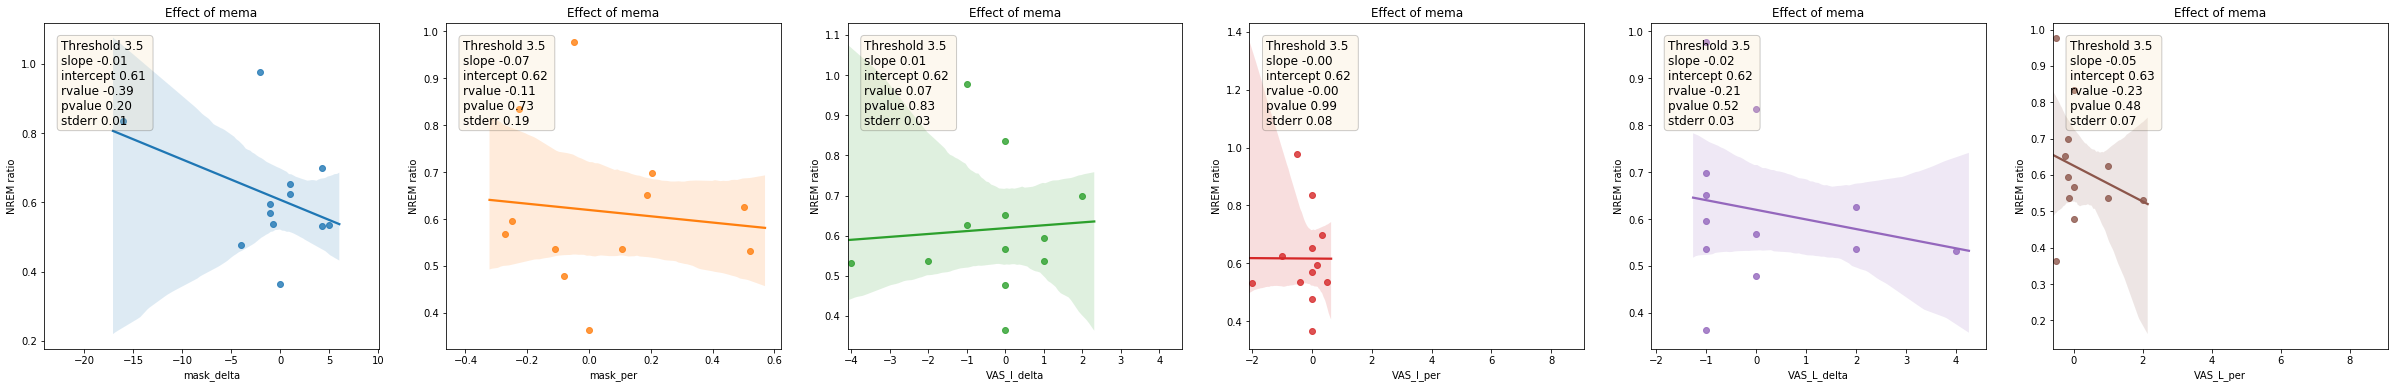

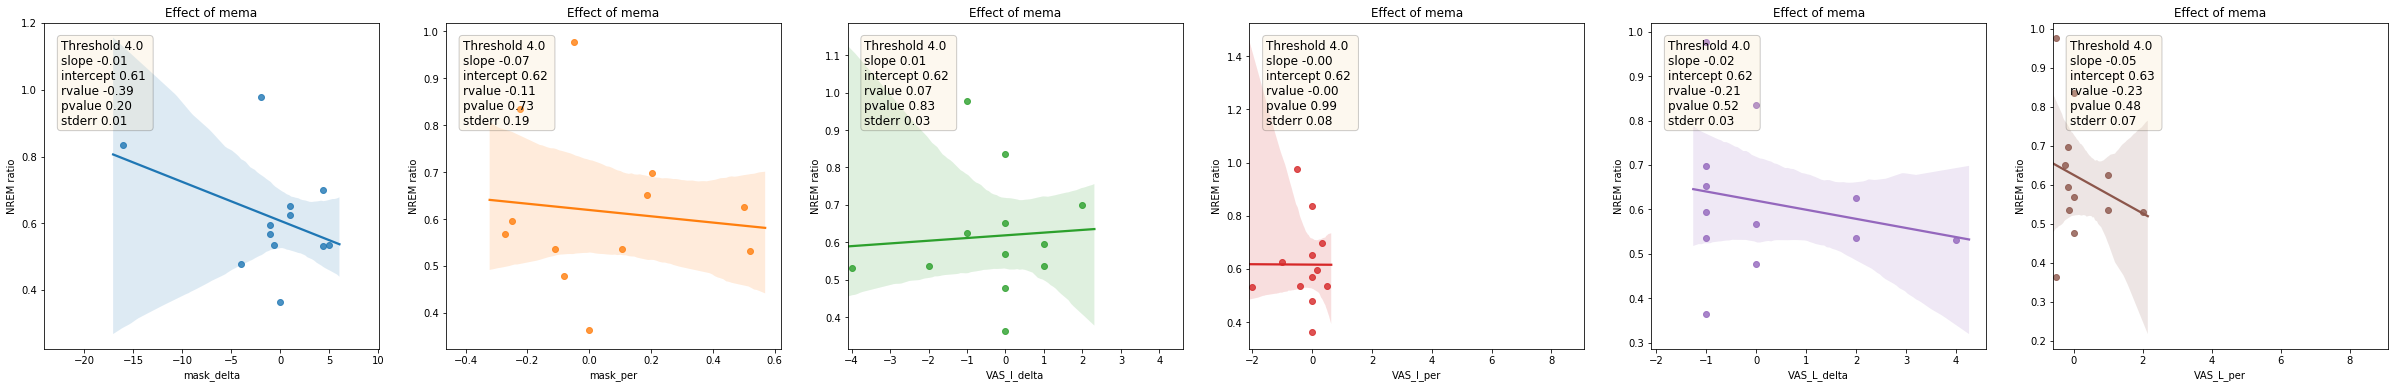

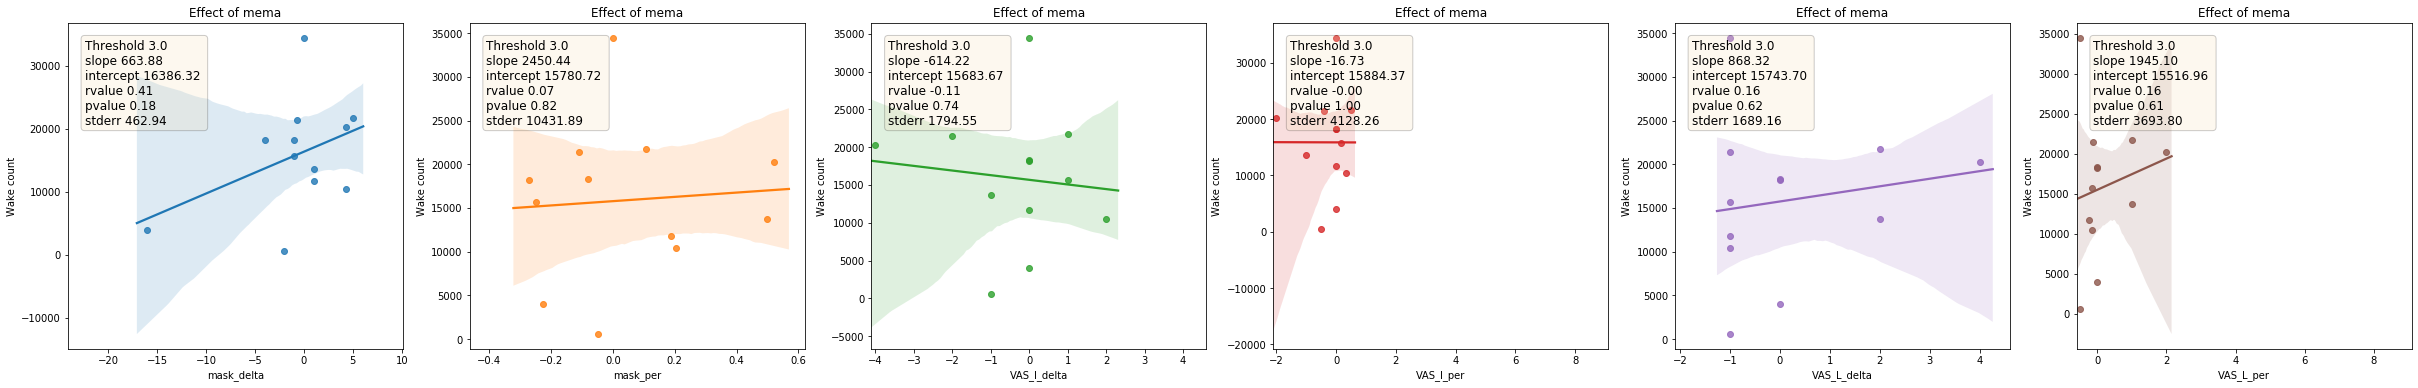

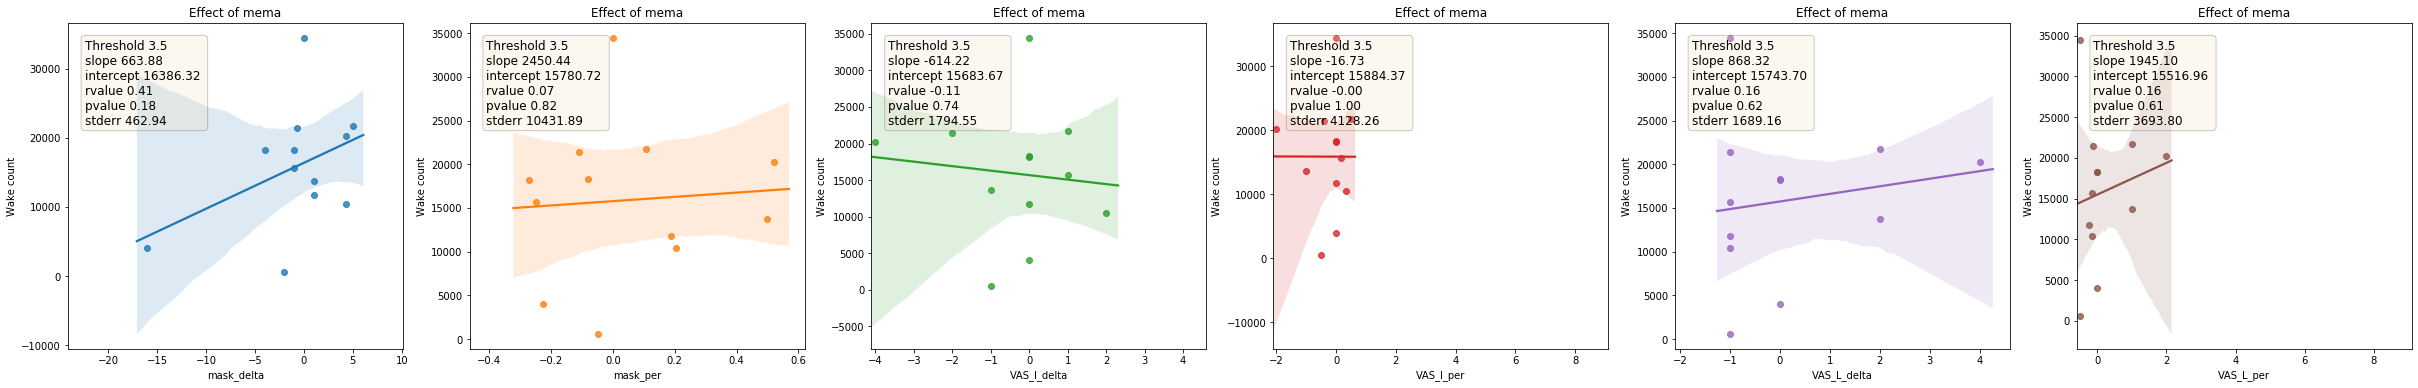

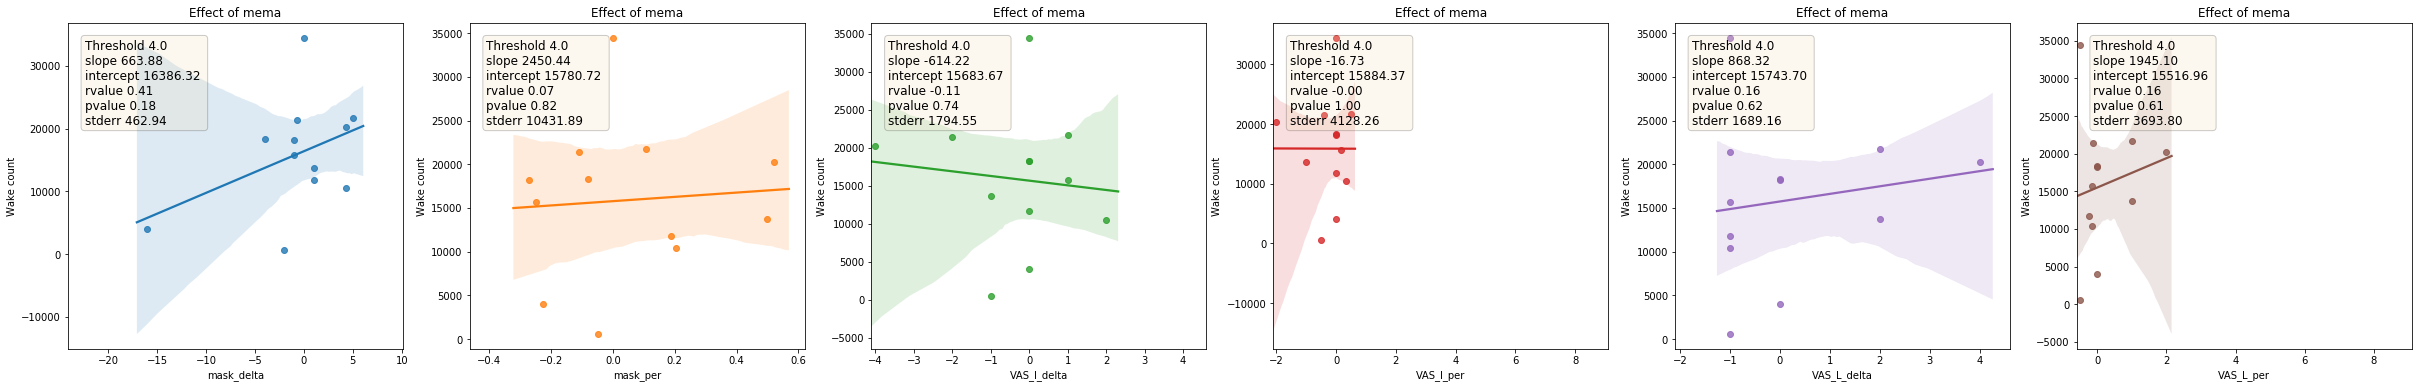

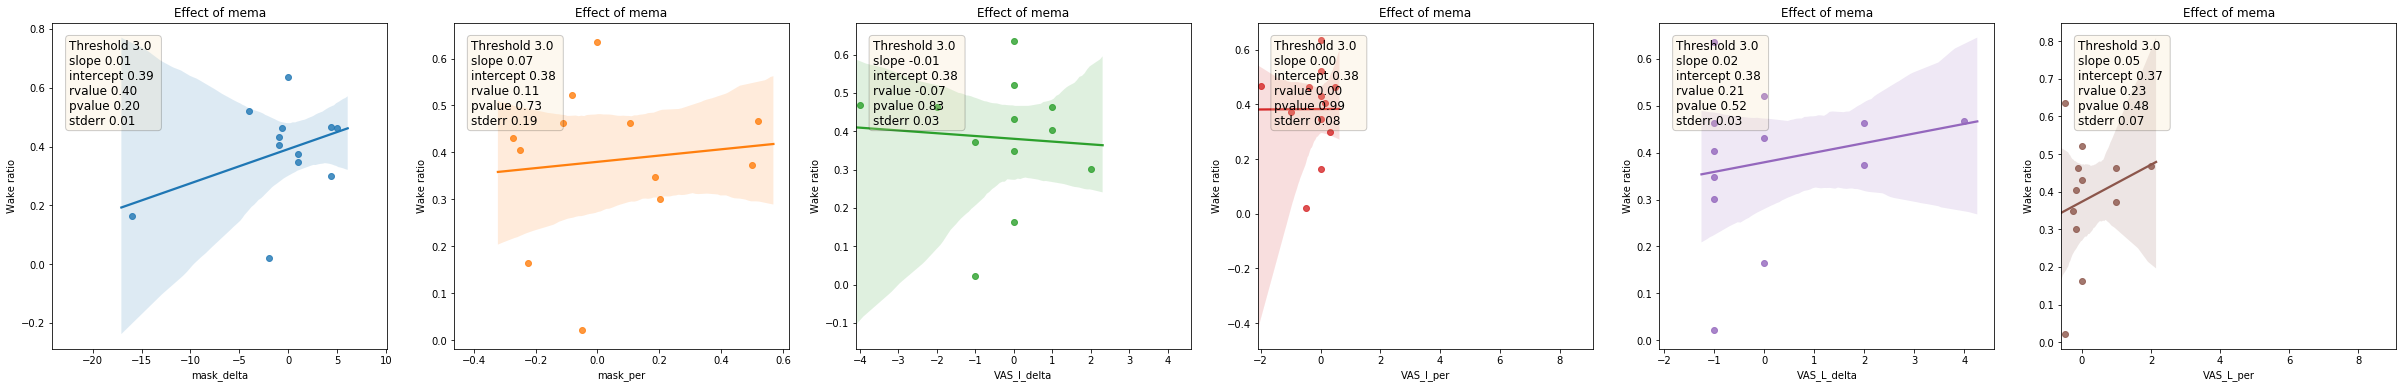

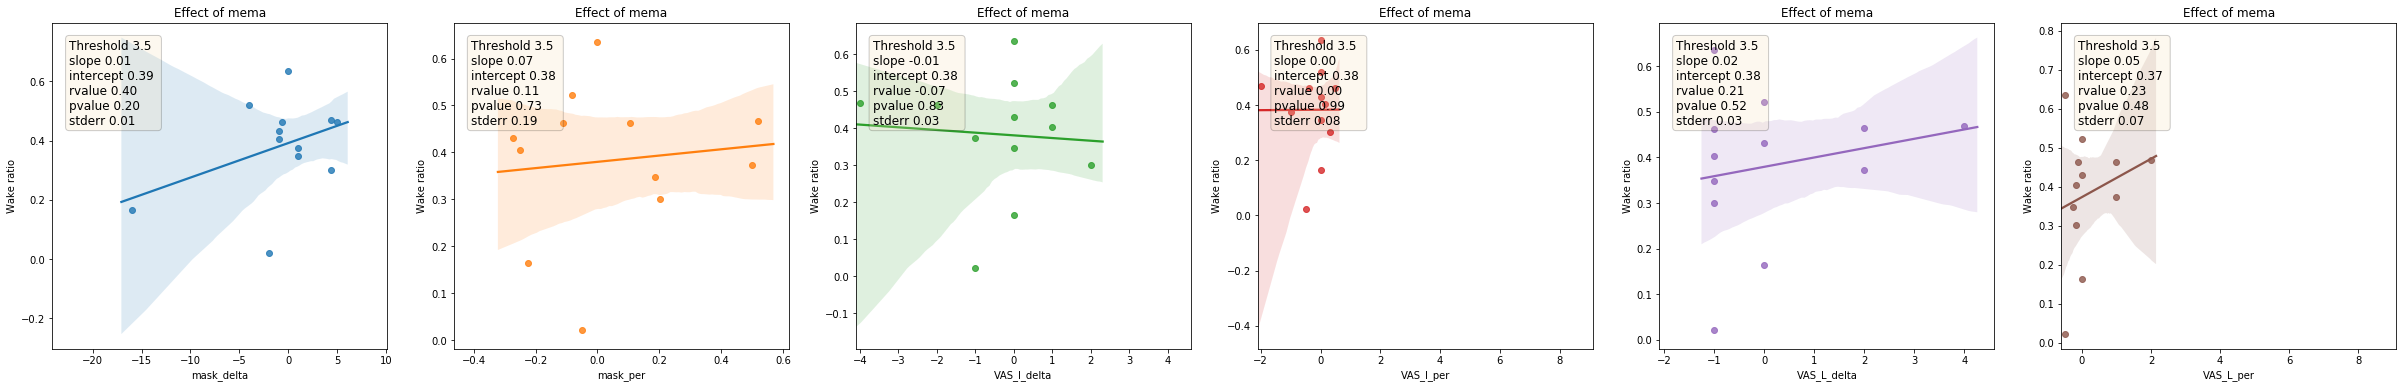

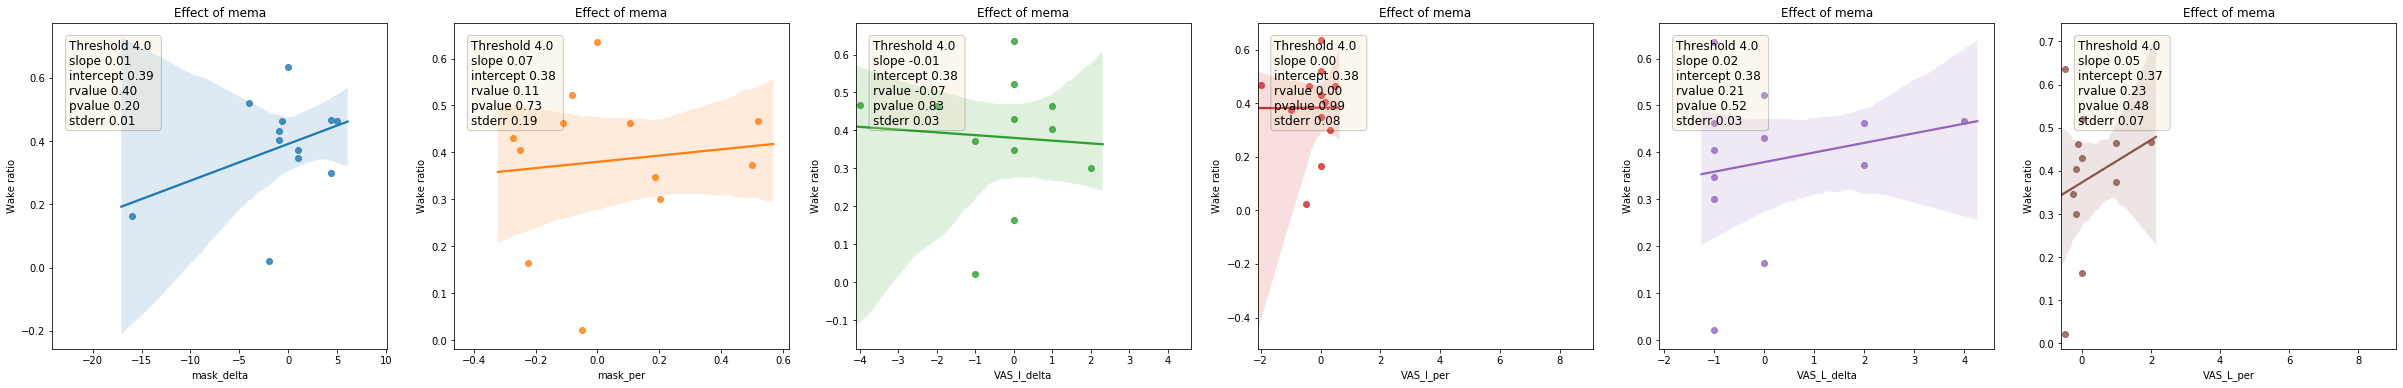

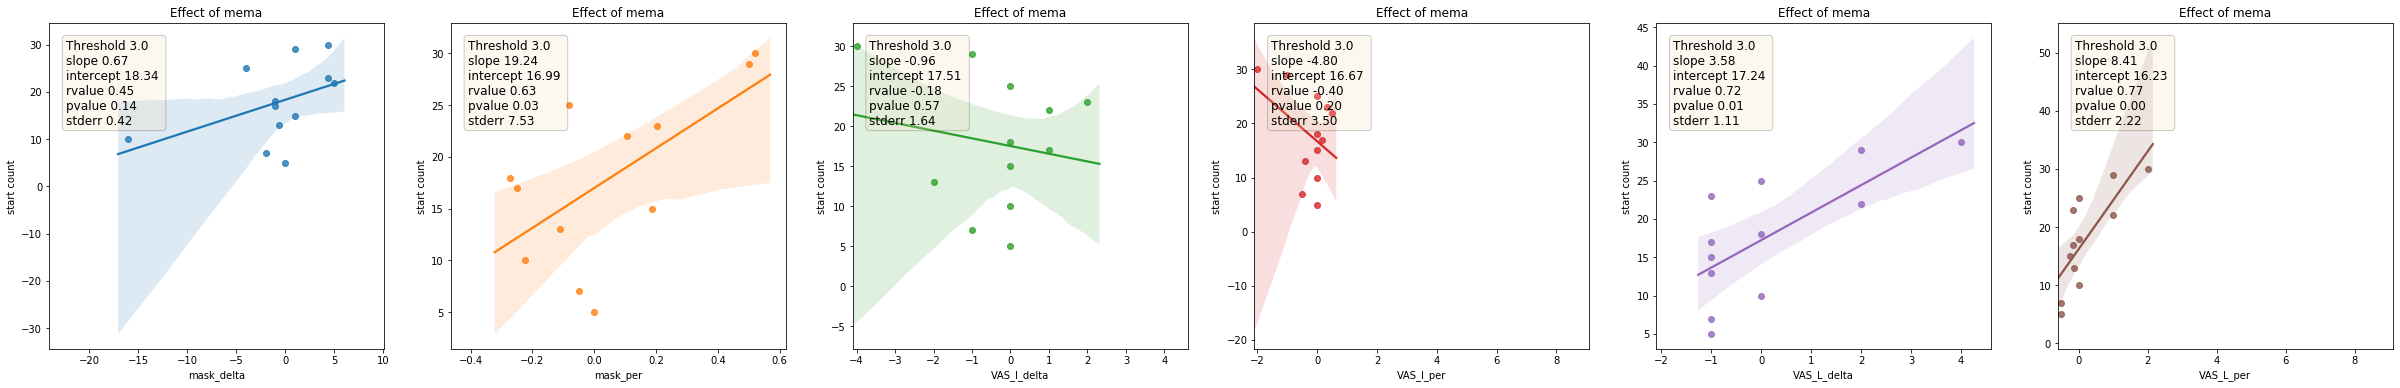

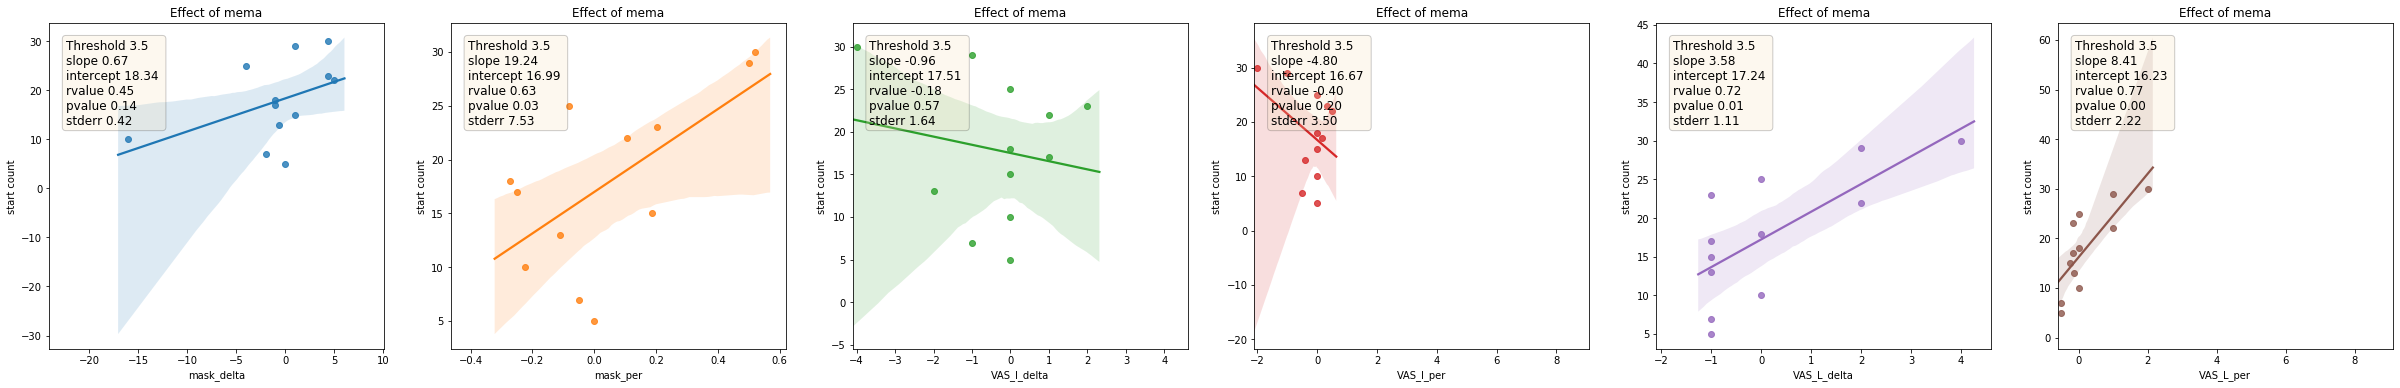

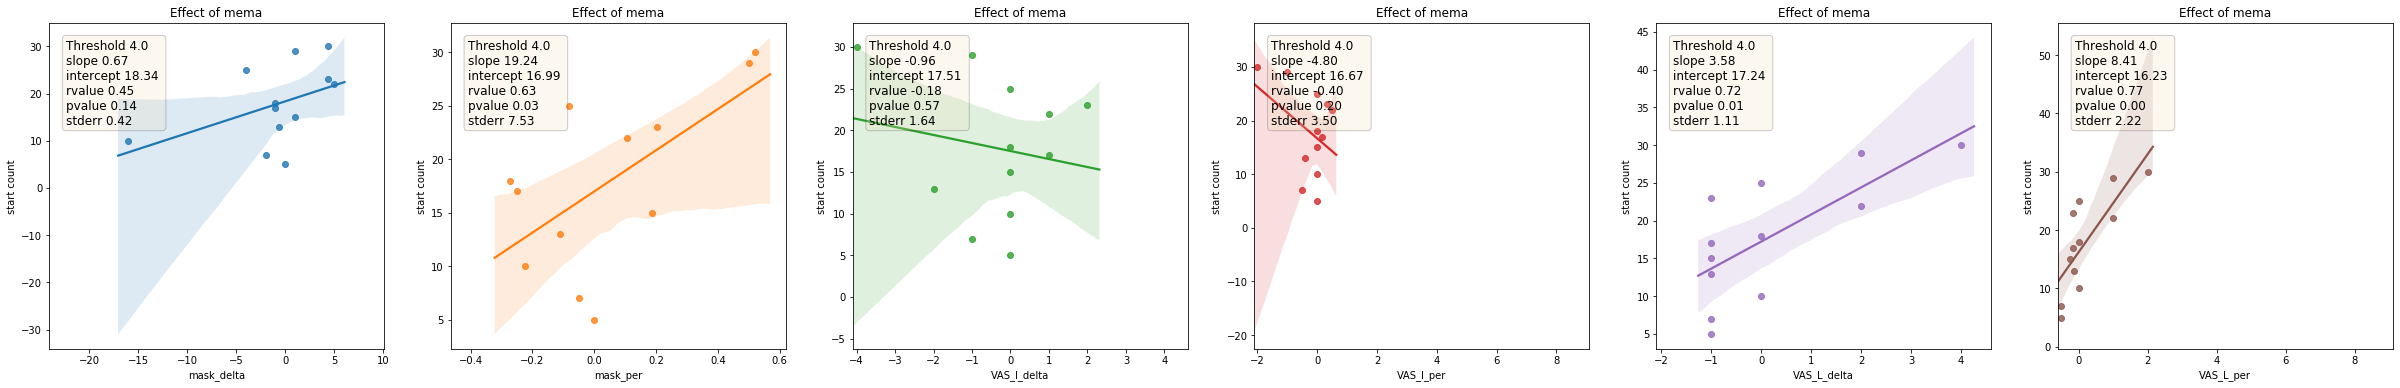

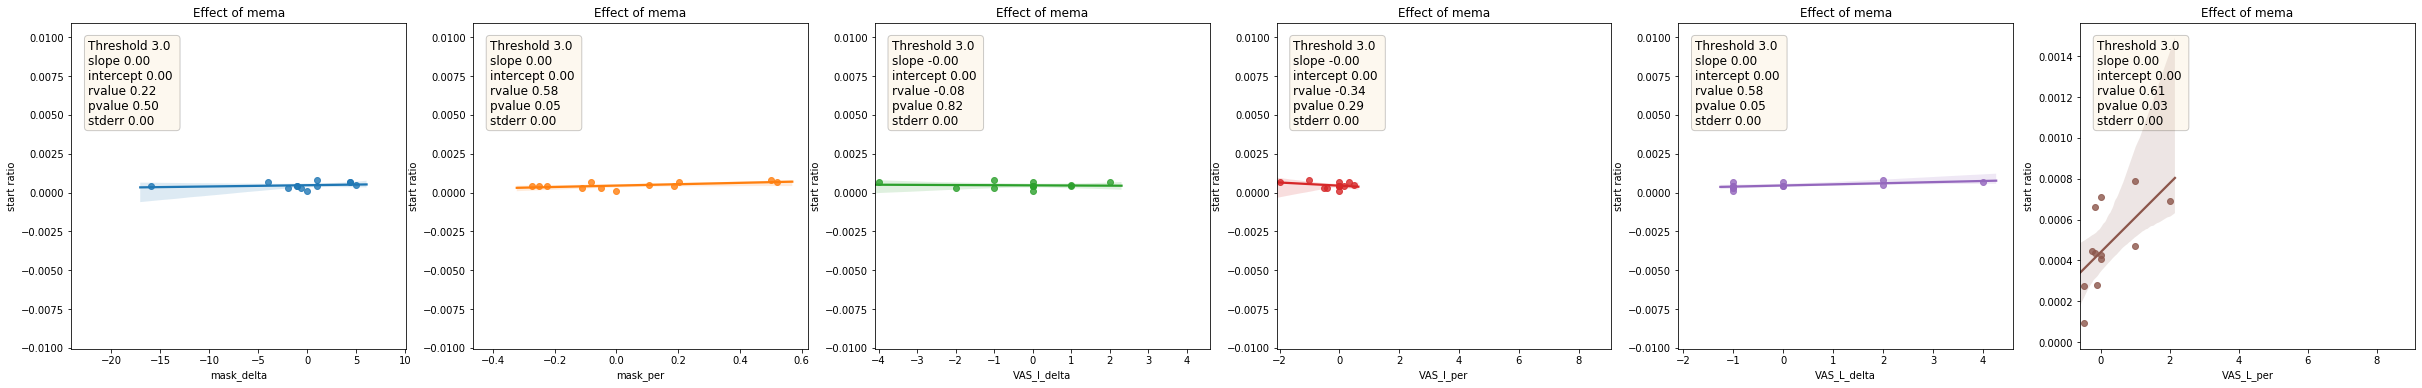

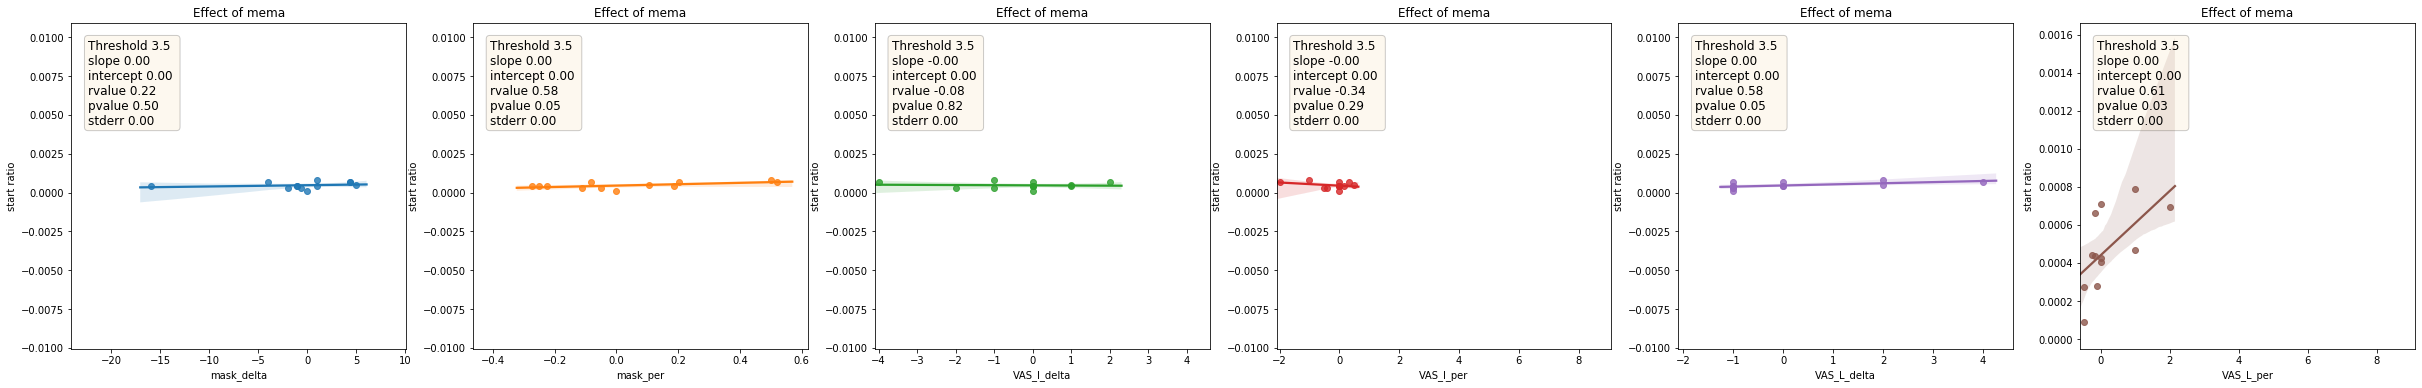

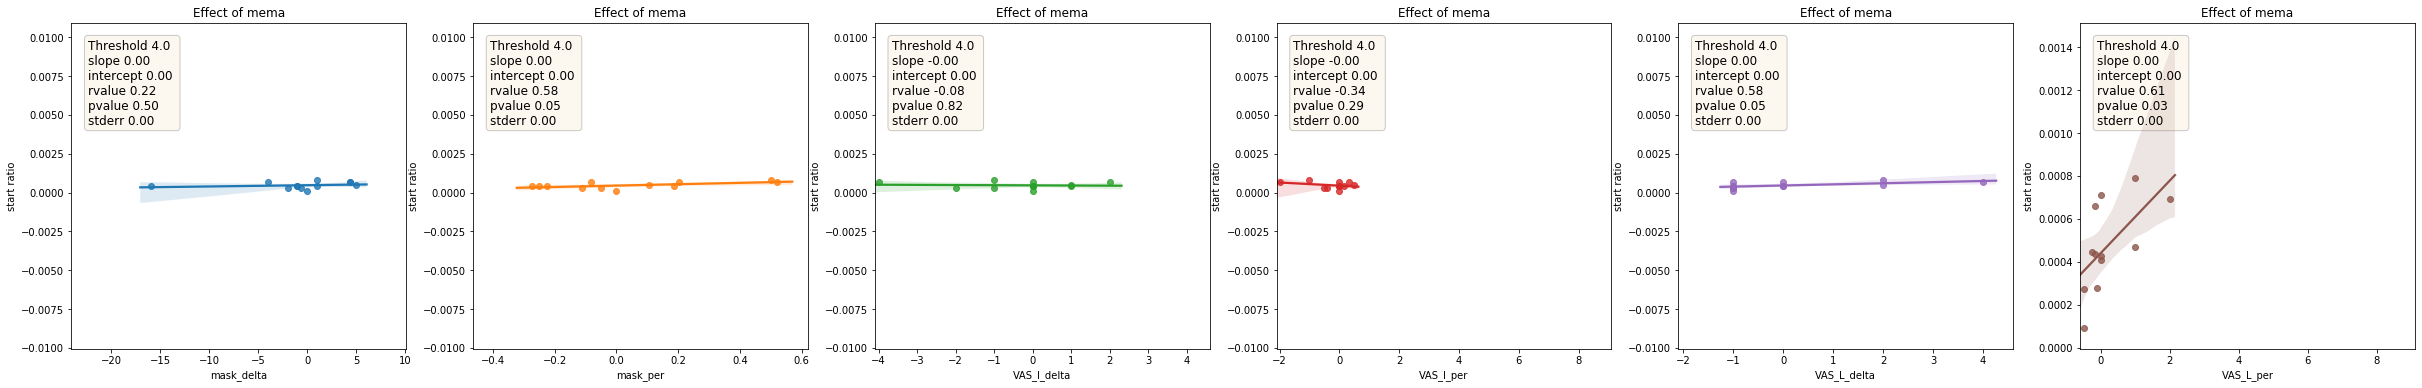

In [62]:
import seaborn as sns
plt.close("all")
meta_results = pd.DataFrame()

data = reports.query("category != 'control'")
# loop over all quantitative variables (y_axis)
for y_axis in quantitative_variables:
    # loop on all classification results (each figure)
    for threshold in reports["THR_classif"].unique():
        data_loc = data[data["THR_classif"]==threshold]
        f, axes = plt.subplots(1, len(effect_variable), figsize=(len(effect_variable)*7, 6))
        # loop on all effect variables (each subplot)
        for x_axis, ax in zip(effect_variable, axes):
            sns.regplot(x=x_axis,y=y_axis,data=data_loc,fit_reg=True, ax=ax)
            ax.set_xlim(min(data_loc[x_axis].values)-0.1,max(data_loc[x_axis].values)+0.1)
            df = pd.DataFrame({'x': data_loc[x_axis].values, 'y': data_loc[y_axis].values}).dropna()
            regression_result = scipy.stats.linregress(df.x,df.y)
            tmp = {"x_axis":x_axis, "y_axis":y_axis, "THR_classif": [threshold]}
            textstr = f"Threshold {threshold:.1f} "
            for a, re in zip(regression_result._fields, regression_result):
                textstr = textstr + "\n" + f"{a} {re:.2f} "
                tmp[a] = [re]
            ax.set_title("Effect of mema")
            # place patch
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
            ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
                    verticalalignment='top', bbox=props)
            
            # save results
            meta_results = pd.concat([meta_results, pd.DataFrame(tmp)])



In [63]:
meta_results.query("pvalue < 0.05")

x_axis                            y_axis  THR_classif        slope  \
0   VAS_I_delta               Clean MEMA duration          3.0   991.332384   
0     VAS_I_per               Clean MEMA duration          3.0  1158.597689   
0   VAS_L_delta               Clean MEMA duration          3.0  1040.578802   
0     VAS_L_per               Clean MEMA duration          3.0  1249.712665   
0   VAS_I_delta               Clean MEMA duration          3.5   991.332384   
0     VAS_I_per               Clean MEMA duration          3.5  1158.597689   
0   VAS_L_delta               Clean MEMA duration          3.5  1040.578802   
0     VAS_L_per               Clean MEMA duration          3.5  1249.712665   
0   VAS_I_delta               Clean MEMA duration          4.0   991.332384   
0     VAS_I_per               Clean MEMA duration          4.0  1158.597689   
0   VAS_L_delta               Clean MEMA duration          4.0  1040.578802   
0     VAS_L_per               Clean MEMA duration          4.0  1249.712665   
0   VAS_I_delta         Total MEMA burst duration          3.0    98.809257   
0   VAS_L_delta         Total MEMA burst duration          3.0    77.129795   
0   VAS_I_delta         Total MEMA burst duration          3.5    82.449669   
0   VAS_L_delta         Total MEMA burst duration          3.5    64.156203   
0   VAS_I_delta         Total MEMA burst duration          4.0    71.126832   
0   VAS_L_delta         Total MEMA burst duration          4.0    53.974090   
0    mask_delta        Total number of MEMA burst          3.0    11.398680   
0   VAS_I_delta        Total number of MEMA burst          3.0    51.895688   
0   VAS_L_delta        Total number of MEMA burst          3.0    49.217077   
0    mask_delta        Total number of MEMA burst          3.5     9.653709   
0   VAS_I_delta        Total number of MEMA burst          3.5    46.090403   
0   VAS_L_delta        Total number of MEMA burst          3.5    43.280753   
0   VAS_I_delta        Total number of MEMA burst          4.0    41.502086   
0   VAS_L_delta        Total number of MEMA burst          4.0    37.221418   
0    mask_delta    Number of MEMA bursts per hour          3.0     1.397856   
0   VAS_I_delta    Number of MEMA bursts per hour          3.0     5.599505   
0   VAS_L_delta    Number of MEMA bursts per hour          3.0     5.137856   
0   VAS_I_delta    Number of MEMA bursts per hour          3.5     5.006467   
..          ...                               ...          ...          ...   
0   VAS_I_delta     Total number of MEMA episodes          3.0    40.478442   
0   VAS_L_delta     Total number of MEMA episodes          3.0    42.390738   
0   VAS_I_delta     Total number of MEMA episodes          3.5    36.495132   
0   VAS_L_delta     Total number of MEMA episodes          3.5    37.105644   
0   VAS_I_delta     Total number of MEMA episodes          4.0    34.119611   
0   VAS_L_delta     Total number of MEMA episodes          4.0    32.772793   
0   VAS_I_delta  Number of MEMA episodes per hour          3.0     4.309151   
0   VAS_L_delta  Number of MEMA episodes per hour          3.0     4.571173   
0   VAS_I_delta  Number of MEMA episodes per hour          3.5     3.917935   
0   VAS_L_delta  Number of MEMA episodes per hour          3.5     3.989415   
0   VAS_I_delta  Number of MEMA episodes per hour          4.0     3.702763   
0   VAS_L_delta  Number of MEMA episodes per hour          4.0     3.471633   
0    mask_delta                         End ratio          3.0    -0.000027   
0    mask_delta                         End ratio          3.5    -0.000027   
0    mask_delta                         End ratio          4.0    -0.000027   
0      mask_per                       start count          3.0    19.244282   
0   VAS_L_delta                       start count          3.0     3.584270   
0     VAS_L_per                       start count          3.0     8.407033   
0      mask_per                       start count          

[ True False False  True False False  True False False  True False False
  True False False  True False False]
[False  True False False  True False False  True False False  True False
 False  True False False  True False]
[False False  True False False  True False False  True False False  True
 False False  True False False  True]
[ True False False  True False False  True False False  True False False
  True False False  True False False]
[False  True False False  True False False  True False False  True False
 False  True False False  True False]
[False False  True False False  True False False  True False False  True
 False False  True False False  True]


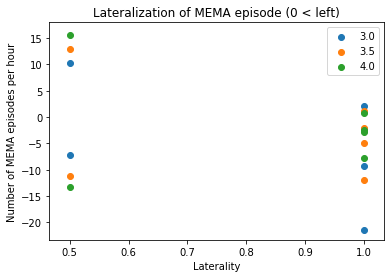

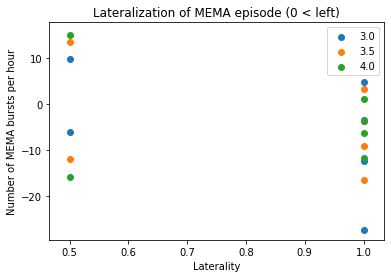

In [50]:
x_axis = "Laterality"
for y_axis in ["Number of MEMA episodes per hour", "Number of MEMA bursts per hour"]:
    plt.figure()
    y_data = reports.loc[reports["condition"]=="habituation"][y_axis].values - reports.loc[reports["condition"]=="resmed"][y_axis].values
    for threshold in reports["THR_classif"].unique():
        index = (reports.loc[reports["condition"]=="habituation"]["THR_classif"] == threshold).values
        print(index)
        plt.scatter(reports.loc[reports["condition"]=="habituation"][x_axis].values[index], y_data[index], label=threshold )
    plt.legend()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title("Lateralization of MEMA episode (0 < right)")